In [1]:
import math,random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import operator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# # Preprocessing Data

dataset = pd.read_csv('datasets/Seed_Data.csv',header=None)
data=dataset.iloc[1:,:7]
target = dataset.iloc[1:,-1:]
data = np.array(data)
data = data.astype(np.float)
type(data)


# In[3]:


from sklearn.preprocessing import normalize
data = normalize(data)
data


# # Kmeans

from sklearn.cluster import KMeans


# # Fungsi Genetic Algorithm

#fungsi untuk mengecek apakah benar tipe set isinya sama dengan isi pada numpy jawab
def isValid(jawab,benar):
    if(set(jawab)==benar):
        return True
    else:
        return False


#fungsi untuk mendapatkan center dari setiap dataset sesuai dengan dia masuk kelas mana
def dapatNilaiCenter(kromosom):
    centers_setiap_kromosom={}
    for i in set(kromosom):
        kelas=[]
        for j in kromosom:
            if(j==i):
                kelas.append(True)
            else:
                kelas.append(False)
        centers_setiap_kromosom[i]=np.array(data[kelas].mean())
    return centers_setiap_kromosom

#fungsi untuk melakukan iterasi untuk mendapatkan center dari setiap kromosom
def getCenters(Populasi):
    GenCenters=[]
    for kromosom in Populasi:
        GenCenters.append(dapatNilaiCenter(kromosom))
    return GenCenters



from scipy.spatial import distance

#fungsi untuk mendapat nilai fitness dengan menghitung jarak antar data itu dengan center dari suatu sample                                        
def getFit(kromosom,centers):
    fit=0
    for i in range(0,len(kromosom)):
        fit = fit + distance.euclidean(data[i] , centers[kromosom[i]])
    return fit

#fungsi untuk melakukan iterasi untuk mendapatkan nilai fittness setiap kromosom
def getFitness(Populasi):
    PopulasiCenters=getCenters(Populasi)
    nilai_fitness=[]                                                
    for i in range(0,len(Populasi)):
        nilai_fitness.append(getFit(Populasi[i],PopulasiCenters[i]))
    return nilai_fitness


# In[8]:


#fungsi untuk melakukan crossover antar parent secara one point crossover
def crossOver(c1,c2):
    prob=np.random.randint(1,len(c1))
    c1[prob:],c2[prob:]=c2[prob:],c1[prob:]
    return c1,c2


# In[9]:


#fungsi untuk melakukan mutasi setiap kromosom secara random
def mute(kromosom):
    target=np.random.randint(0,R)
    ubah=np.random.randint(0,K) 
    if(kromosom[target]!=ubah):
        kromosom[target]=ubah
    else:
        kromosom[target]=(kromosom[target]+ubah)%K
        
#fungsi untuk melakukan iterasi untuk menghasilkan mutasi setiap kromosom
def mutate(Gen):
    for samp in Gen: 
        pb=np.random.random()
        if(pb<mp):
            mute(samp)



cp=0.8
mp=0.5
score1 = []
score2 = []
score3 = []
for i in range(2,9):
    
    print("===============================================")
    print("Saat nilai K = ",i)
    print("===============================================")
    
    # Number of clusters
    kmeans = KMeans(n_clusters=i)
    # Fitting the input data
    kmeans = kmeans.fit(data)
    # Getting the cluster labels
    labels = kmeans.predict(data)
    # Centroid values
    C = kmeans.cluster_centers_
    
    K=i
    R=len(data)  
    c=set(np.linspace(0,K-1,K))
    P=6 
    i=0
    currentGen=[]
    nextGen=[]
    while(i<P):
            nextGen.append([])
            currentGen.append(list( np.random.randint(0,K,R)))
            print(i,currentGen[i])
            i=i+1
    thebest=currentGen[0]



    generasi=1
    while(generasi<=2000):
        print("Mulai ke generasi ",generasi)

        #Selection
        fit=np.array(getFitness(currentGen))
        pool=fit.argsort()


        #CrossOver
        for i in range(0,P,2):
            pb=np.random.random()

            #pemilihan kromosom tersebut dilakukan crossover maupun tidak, dilakukan secara random
            if(pb<cp):
                while(True):
                    hasil1,hasil2=crossOver(currentGen[pool[i]],currentGen[pool[i+1]])

                    #menentukan hasilnya valid ngga
                    if(isValid(hasil1,c) and isValid(hasil2,c)):
                        break
            else:  
                hasil1,hasil2=currentGen[pool[i]],currentGen[pool[i+1]]

            #memasukkan hasil dari kromosom yang telah dilakukan crossover
            nextGen[i]=hasil1
            nextGen[i+1]=hasil2


        # Mutation
        mutate(nextGen)

        curr_fit=list(fit)
        next_fit=np.array(getFitness(nextGen))

        #mengambil nilai fitness dari suatu generasi
        NilaiFitBest=currentGen[fit.argmin()].copy()

        #mencari nilai TheBest dari setiap generasi
        if(silhouette_score(data,thebest) < silhouette_score(data,NilaiFitBest)):
            thebest=NilaiFitBest.copy()   

        if(max(next_fit)>min(curr_fit)):              
            nextGen[next_fit.argmax()]=thebest.copy()

        currentGen=nextGen.copy()
        print("silhouette score =",silhouette_score(data,NilaiFitBest))
        generasi=generasi+1

    a = silhouette_score(data,NilaiFitBest)
    b = silhouette_score(data,thebest)
    c = silhouette_score(data,labels)
    print('Nilai silhouette score dengan hasil generasi terakhir = ',a)
    print('Nilai silhouette score dengan hasil the best generasi = ',b)
    print('Nilai silhouette score dengan hasil KMEANS = ',c)
    score1.append(a)
    score2.append(b)
    score3.append(c)


Saat nilai K =  2
0 [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
1 [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0

silhouette score = 0.07503302691516504
Mulai ke generasi  73
silhouette score = 0.08322580158631825
Mulai ke generasi  74
silhouette score = 0.08322580158631825
Mulai ke generasi  75
silhouette score = 0.08532567745319683
Mulai ke generasi  76
silhouette score = 0.08541043237808042
Mulai ke generasi  77
silhouette score = 0.08541043237808042
Mulai ke generasi  78
silhouette score = 0.08541043237808042
Mulai ke generasi  79
silhouette score = 0.07986225743683384
Mulai ke generasi  80
silhouette score = 0.08167969646735976
Mulai ke generasi  81
silhouette score = 0.08903346890065943
Mulai ke generasi  82
silhouette score = 0.08903346890065943
Mulai ke generasi  83
silhouette score = 0.09408128213009911
Mulai ke generasi  84
silhouette score = 0.09185322800058225
Mulai ke generasi  85
silhouette score = 0.09408128213009911
Mulai ke generasi  86
silhouette score = 0.09408128213009911
Mulai ke generasi  87
silhouette score = 0.09321322573032485
Mulai ke generasi  88
silhouette score = 0.087

silhouette score = 0.23902919976654716
Mulai ke generasi  207
silhouette score = 0.23681195546752107
Mulai ke generasi  208
silhouette score = 0.23536206590549494
Mulai ke generasi  209
silhouette score = 0.2469841706228985
Mulai ke generasi  210
silhouette score = 0.2469841706228985
Mulai ke generasi  211
silhouette score = 0.2469841706228985
Mulai ke generasi  212
silhouette score = 0.2469841706228985
Mulai ke generasi  213
silhouette score = 0.2469841706228985
Mulai ke generasi  214
silhouette score = 0.2476788783753302
Mulai ke generasi  215
silhouette score = 0.25349480596192164
Mulai ke generasi  216
silhouette score = 0.25349480596192164
Mulai ke generasi  217
silhouette score = 0.25349480596192164
Mulai ke generasi  218
silhouette score = 0.2629493547470428
Mulai ke generasi  219
silhouette score = 0.25392230979785624
Mulai ke generasi  220
silhouette score = 0.2629493547470428
Mulai ke generasi  221
silhouette score = 0.2629493547470428
Mulai ke generasi  222
silhouette score 

silhouette score = 0.35669555448095447
Mulai ke generasi  342
silhouette score = 0.35669555448095447
Mulai ke generasi  343
silhouette score = 0.35669555448095447
Mulai ke generasi  344
silhouette score = 0.35984555766443
Mulai ke generasi  345
silhouette score = 0.35984555766443
Mulai ke generasi  346
silhouette score = 0.35984555766443
Mulai ke generasi  347
silhouette score = 0.35984555766443
Mulai ke generasi  348
silhouette score = 0.35984555766443
Mulai ke generasi  349
silhouette score = 0.3524817799214138
Mulai ke generasi  350
silhouette score = 0.3637562106665293
Mulai ke generasi  351
silhouette score = 0.3637562106665293
Mulai ke generasi  352
silhouette score = 0.36150953339531916
Mulai ke generasi  353
silhouette score = 0.3620085258810268
Mulai ke generasi  354
silhouette score = 0.35226247129604976
Mulai ke generasi  355
silhouette score = 0.3637562106665293
Mulai ke generasi  356
silhouette score = 0.36624840677085707
Mulai ke generasi  357
silhouette score = 0.3662484

silhouette score = 0.403716473229494
Mulai ke generasi  480
silhouette score = 0.39666563816715295
Mulai ke generasi  481
silhouette score = 0.403716473229494
Mulai ke generasi  482
silhouette score = 0.403716473229494
Mulai ke generasi  483
silhouette score = 0.403716473229494
Mulai ke generasi  484
silhouette score = 0.403716473229494
Mulai ke generasi  485
silhouette score = 0.4076997433343089
Mulai ke generasi  486
silhouette score = 0.4076997433343089
Mulai ke generasi  487
silhouette score = 0.3962385382558574
Mulai ke generasi  488
silhouette score = 0.403716473229494
Mulai ke generasi  489
silhouette score = 0.4076997433343089
Mulai ke generasi  490
silhouette score = 0.3966978349659804
Mulai ke generasi  491
silhouette score = 0.4076997433343089
Mulai ke generasi  492
silhouette score = 0.4076997433343089
Mulai ke generasi  493
silhouette score = 0.4005581937803792
Mulai ke generasi  494
silhouette score = 0.40568203005784786
Mulai ke generasi  495
silhouette score = 0.3996838

silhouette score = 0.42672183200148117
Mulai ke generasi  617
silhouette score = 0.42672183200148117
Mulai ke generasi  618
silhouette score = 0.42672183200148117
Mulai ke generasi  619
silhouette score = 0.42672183200148117
Mulai ke generasi  620
silhouette score = 0.42688778460273913
Mulai ke generasi  621
silhouette score = 0.42688778460273913
Mulai ke generasi  622
silhouette score = 0.4172335759464062
Mulai ke generasi  623
silhouette score = 0.42688778460273913
Mulai ke generasi  624
silhouette score = 0.42688778460273913
Mulai ke generasi  625
silhouette score = 0.42688778460273913
Mulai ke generasi  626
silhouette score = 0.4159079285361329
Mulai ke generasi  627
silhouette score = 0.42672183200148117
Mulai ke generasi  628
silhouette score = 0.42688778460273913
Mulai ke generasi  629
silhouette score = 0.42688778460273913
Mulai ke generasi  630
silhouette score = 0.42688778460273913
Mulai ke generasi  631
silhouette score = 0.42688778460273913
Mulai ke generasi  632
silhouette

silhouette score = 0.44756284382352823
Mulai ke generasi  752
silhouette score = 0.4598414350447731
Mulai ke generasi  753
silhouette score = 0.4598414350447731
Mulai ke generasi  754
silhouette score = 0.45754248642711104
Mulai ke generasi  755
silhouette score = 0.44883949898387376
Mulai ke generasi  756
silhouette score = 0.45754248642711104
Mulai ke generasi  757
silhouette score = 0.4598414350447731
Mulai ke generasi  758
silhouette score = 0.4598414350447731
Mulai ke generasi  759
silhouette score = 0.449708527300406
Mulai ke generasi  760
silhouette score = 0.4598414350447731
Mulai ke generasi  761
silhouette score = 0.4598414350447731
Mulai ke generasi  762
silhouette score = 0.4598414350447731
Mulai ke generasi  763
silhouette score = 0.4563152666936476
Mulai ke generasi  764
silhouette score = 0.4598414350447731
Mulai ke generasi  765
silhouette score = 0.4598414350447731
Mulai ke generasi  766
silhouette score = 0.44923545211817445
Mulai ke generasi  767
silhouette score = 0

silhouette score = 0.4708695939480239
Mulai ke generasi  889
silhouette score = 0.4821860385776988
Mulai ke generasi  890
silhouette score = 0.4821860385776988
Mulai ke generasi  891
silhouette score = 0.4821860385776988
Mulai ke generasi  892
silhouette score = 0.4821860385776988
Mulai ke generasi  893
silhouette score = 0.4821860385776988
Mulai ke generasi  894
silhouette score = 0.4821860385776988
Mulai ke generasi  895
silhouette score = 0.4821860385776988
Mulai ke generasi  896
silhouette score = 0.4821860385776988
Mulai ke generasi  897
silhouette score = 0.4821860385776988
Mulai ke generasi  898
silhouette score = 0.4821860385776988
Mulai ke generasi  899
silhouette score = 0.4821860385776988
Mulai ke generasi  900
silhouette score = 0.4821860385776988
Mulai ke generasi  901
silhouette score = 0.4821860385776988
Mulai ke generasi  902
silhouette score = 0.4821860385776988
Mulai ke generasi  903
silhouette score = 0.4821860385776988
Mulai ke generasi  904
silhouette score = 0.477

silhouette score = 0.49014960505365285
Mulai ke generasi  1024
silhouette score = 0.4779516878492048
Mulai ke generasi  1025
silhouette score = 0.4820361010213308
Mulai ke generasi  1026
silhouette score = 0.49014960505365285
Mulai ke generasi  1027
silhouette score = 0.48147384218160055
Mulai ke generasi  1028
silhouette score = 0.48642458728890575
Mulai ke generasi  1029
silhouette score = 0.48009772579155635
Mulai ke generasi  1030
silhouette score = 0.49014960505365285
Mulai ke generasi  1031
silhouette score = 0.49014960505365285
Mulai ke generasi  1032
silhouette score = 0.49014960505365285
Mulai ke generasi  1033
silhouette score = 0.49014960505365285
Mulai ke generasi  1034
silhouette score = 0.49014960505365285
Mulai ke generasi  1035
silhouette score = 0.47900837705352506
Mulai ke generasi  1036
silhouette score = 0.48065413336068824
Mulai ke generasi  1037
silhouette score = 0.49014960505365285
Mulai ke generasi  1038
silhouette score = 0.49014960505365285
Mulai ke generasi 

silhouette score = 0.4878112331895502
Mulai ke generasi  1157
silhouette score = 0.49761694280633245
Mulai ke generasi  1158
silhouette score = 0.49761694280633245
Mulai ke generasi  1159
silhouette score = 0.5001637463803014
Mulai ke generasi  1160
silhouette score = 0.5001637463803014
Mulai ke generasi  1161
silhouette score = 0.4903161400989319
Mulai ke generasi  1162
silhouette score = 0.48921642458058034
Mulai ke generasi  1163
silhouette score = 0.5001637463803014
Mulai ke generasi  1164
silhouette score = 0.5001637463803014
Mulai ke generasi  1165
silhouette score = 0.5001637463803014
Mulai ke generasi  1166
silhouette score = 0.5001637463803014
Mulai ke generasi  1167
silhouette score = 0.5001637463803014
Mulai ke generasi  1168
silhouette score = 0.4888835325846704
Mulai ke generasi  1169
silhouette score = 0.4869638970108028
Mulai ke generasi  1170
silhouette score = 0.48879292254965817
Mulai ke generasi  1171
silhouette score = 0.493230547349496
Mulai ke generasi  1172
silho

silhouette score = 0.5001637463803014
Mulai ke generasi  1290
silhouette score = 0.5001637463803014
Mulai ke generasi  1291
silhouette score = 0.49301685095179004
Mulai ke generasi  1292
silhouette score = 0.4889412976084714
Mulai ke generasi  1293
silhouette score = 0.5001637463803014
Mulai ke generasi  1294
silhouette score = 0.5001637463803014
Mulai ke generasi  1295
silhouette score = 0.5001637463803014
Mulai ke generasi  1296
silhouette score = 0.49741984597075384
Mulai ke generasi  1297
silhouette score = 0.5001637463803014
Mulai ke generasi  1298
silhouette score = 0.5001637463803014
Mulai ke generasi  1299
silhouette score = 0.4969356549937787
Mulai ke generasi  1300
silhouette score = 0.4888269870541259
Mulai ke generasi  1301
silhouette score = 0.4913744308830521
Mulai ke generasi  1302
silhouette score = 0.5001637463803014
Mulai ke generasi  1303
silhouette score = 0.5001637463803014
Mulai ke generasi  1304
silhouette score = 0.5001637463803014
Mulai ke generasi  1305
silhou

silhouette score = 0.5058672768546286
Mulai ke generasi  1423
silhouette score = 0.5058672768546286
Mulai ke generasi  1424
silhouette score = 0.5058672768546286
Mulai ke generasi  1425
silhouette score = 0.49725662469527676
Mulai ke generasi  1426
silhouette score = 0.49407127686380203
Mulai ke generasi  1427
silhouette score = 0.5058672768546286
Mulai ke generasi  1428
silhouette score = 0.5058672768546286
Mulai ke generasi  1429
silhouette score = 0.49541806976898295
Mulai ke generasi  1430
silhouette score = 0.5058672768546286
Mulai ke generasi  1431
silhouette score = 0.5058672768546286
Mulai ke generasi  1432
silhouette score = 0.5058672768546286
Mulai ke generasi  1433
silhouette score = 0.5042072883201074
Mulai ke generasi  1434
silhouette score = 0.4941180840540569
Mulai ke generasi  1435
silhouette score = 0.5058672768546286
Mulai ke generasi  1436
silhouette score = 0.49616719866819603
Mulai ke generasi  1437
silhouette score = 0.5017406299040362
Mulai ke generasi  1438
silh

silhouette score = 0.5058672768546286
Mulai ke generasi  1557
silhouette score = 0.5058672768546286
Mulai ke generasi  1558
silhouette score = 0.5058672768546286
Mulai ke generasi  1559
silhouette score = 0.5058672768546286
Mulai ke generasi  1560
silhouette score = 0.5016470863698393
Mulai ke generasi  1561
silhouette score = 0.5058672768546286
Mulai ke generasi  1562
silhouette score = 0.5058672768546286
Mulai ke generasi  1563
silhouette score = 0.5058672768546286
Mulai ke generasi  1564
silhouette score = 0.49548810774943186
Mulai ke generasi  1565
silhouette score = 0.5058672768546286
Mulai ke generasi  1566
silhouette score = 0.5058672768546286
Mulai ke generasi  1567
silhouette score = 0.5058672768546286
Mulai ke generasi  1568
silhouette score = 0.5058672768546286
Mulai ke generasi  1569
silhouette score = 0.5017406299040362
Mulai ke generasi  1570
silhouette score = 0.49393539326045416
Mulai ke generasi  1571
silhouette score = 0.5058672768546286
Mulai ke generasi  1572
silhou

silhouette score = 0.5058672768546286
Mulai ke generasi  1689
silhouette score = 0.5058672768546286
Mulai ke generasi  1690
silhouette score = 0.5058672768546286
Mulai ke generasi  1691
silhouette score = 0.5058672768546286
Mulai ke generasi  1692
silhouette score = 0.5058672768546286
Mulai ke generasi  1693
silhouette score = 0.5058672768546286
Mulai ke generasi  1694
silhouette score = 0.5058672768546286
Mulai ke generasi  1695
silhouette score = 0.5058672768546286
Mulai ke generasi  1696
silhouette score = 0.5058672768546286
Mulai ke generasi  1697
silhouette score = 0.5058672768546286
Mulai ke generasi  1698
silhouette score = 0.5058672768546286
Mulai ke generasi  1699
silhouette score = 0.4946697752596898
Mulai ke generasi  1700
silhouette score = 0.49545896476577034
Mulai ke generasi  1701
silhouette score = 0.5058672768546286
Mulai ke generasi  1702
silhouette score = 0.5058672768546286
Mulai ke generasi  1703
silhouette score = 0.5058672768546286
Mulai ke generasi  1704
silhoue

silhouette score = 0.5058672768546286
Mulai ke generasi  1824
silhouette score = 0.5058672768546286
Mulai ke generasi  1825
silhouette score = 0.5058672768546286
Mulai ke generasi  1826
silhouette score = 0.5058672768546286
Mulai ke generasi  1827
silhouette score = 0.5031076751273144
Mulai ke generasi  1828
silhouette score = 0.49511837475939524
Mulai ke generasi  1829
silhouette score = 0.49468139411695694
Mulai ke generasi  1830
silhouette score = 0.5058672768546286
Mulai ke generasi  1831
silhouette score = 0.5058672768546286
Mulai ke generasi  1832
silhouette score = 0.49616719866819603
Mulai ke generasi  1833
silhouette score = 0.5058672768546286
Mulai ke generasi  1834
silhouette score = 0.5029351706250306
Mulai ke generasi  1835
silhouette score = 0.4944969476860755
Mulai ke generasi  1836
silhouette score = 0.5058672768546286
Mulai ke generasi  1837
silhouette score = 0.5058672768546286
Mulai ke generasi  1838
silhouette score = 0.5001637463803014
Mulai ke generasi  1839
silho

silhouette score = 0.5058672768546286
Mulai ke generasi  1958
silhouette score = 0.5058672768546286
Mulai ke generasi  1959
silhouette score = 0.49468139411695694
Mulai ke generasi  1960
silhouette score = 0.5058672768546286
Mulai ke generasi  1961
silhouette score = 0.5006678348271402
Mulai ke generasi  1962
silhouette score = 0.5058672768546286
Mulai ke generasi  1963
silhouette score = 0.4940845422248519
Mulai ke generasi  1964
silhouette score = 0.501949685767266
Mulai ke generasi  1965
silhouette score = 0.501949685767266
Mulai ke generasi  1966
silhouette score = 0.501949685767266
Mulai ke generasi  1967
silhouette score = 0.501949685767266
Mulai ke generasi  1968
silhouette score = 0.501949685767266
Mulai ke generasi  1969
silhouette score = 0.501949685767266
Mulai ke generasi  1970
silhouette score = 0.501949685767266
Mulai ke generasi  1971
silhouette score = 0.501949685767266
Mulai ke generasi  1972
silhouette score = 0.501949685767266
Mulai ke generasi  1973
silhouette score

silhouette score = -0.03191846950841864
Mulai ke generasi  24
silhouette score = -0.03191846950841864
Mulai ke generasi  25
silhouette score = -0.032461333767367186
Mulai ke generasi  26
silhouette score = -0.03191846950841864
Mulai ke generasi  27
silhouette score = -0.0344171046939632
Mulai ke generasi  28
silhouette score = -0.03192824164988754
Mulai ke generasi  29
silhouette score = -0.03191846950841864
Mulai ke generasi  30
silhouette score = -0.03159521138033387
Mulai ke generasi  31
silhouette score = -0.03292943651788469
Mulai ke generasi  32
silhouette score = -0.034894760168658834
Mulai ke generasi  33
silhouette score = -0.031239159428911836
Mulai ke generasi  34
silhouette score = -0.03308742789598889
Mulai ke generasi  35
silhouette score = -0.03045217754164828
Mulai ke generasi  36
silhouette score = -0.02824822949327087
Mulai ke generasi  37
silhouette score = -0.031038362103177248
Mulai ke generasi  38
silhouette score = -0.03218342576338194
Mulai ke generasi  39
silho

silhouette score = 0.02750140089166831
Mulai ke generasi  158
silhouette score = 0.030612440628312195
Mulai ke generasi  159
silhouette score = 0.02627298623559464
Mulai ke generasi  160
silhouette score = 0.025170596503138635
Mulai ke generasi  161
silhouette score = 0.027297958874922996
Mulai ke generasi  162
silhouette score = 0.027297958874922996
Mulai ke generasi  163
silhouette score = 0.030459312511589738
Mulai ke generasi  164
silhouette score = 0.03184222117061338
Mulai ke generasi  165
silhouette score = 0.03184222117061338
Mulai ke generasi  166
silhouette score = 0.03184222117061338
Mulai ke generasi  167
silhouette score = 0.03184222117061338
Mulai ke generasi  168
silhouette score = 0.02971523169121129
Mulai ke generasi  169
silhouette score = 0.03184222117061338
Mulai ke generasi  170
silhouette score = 0.03184222117061338
Mulai ke generasi  171
silhouette score = 0.03184222117061338
Mulai ke generasi  172
silhouette score = 0.03184222117061338
Mulai ke generasi  173
sil

silhouette score = 0.1083248365596779
Mulai ke generasi  292
silhouette score = 0.10497612388592918
Mulai ke generasi  293
silhouette score = 0.10023744549870597
Mulai ke generasi  294
silhouette score = 0.09458097318501171
Mulai ke generasi  295
silhouette score = 0.1051187245708101
Mulai ke generasi  296
silhouette score = 0.10270236598540297
Mulai ke generasi  297
silhouette score = 0.10829688658472228
Mulai ke generasi  298
silhouette score = 0.1077340590217492
Mulai ke generasi  299
silhouette score = 0.0913689357453713
Mulai ke generasi  300
silhouette score = 0.0947562090367463
Mulai ke generasi  301
silhouette score = 0.10633273598229778
Mulai ke generasi  302
silhouette score = 0.10716032984483347
Mulai ke generasi  303
silhouette score = 0.0989968639617517
Mulai ke generasi  304
silhouette score = 0.10903204671012046
Mulai ke generasi  305
silhouette score = 0.10223136182032633
Mulai ke generasi  306
silhouette score = 0.10713784179410811
Mulai ke generasi  307
silhouette sco

silhouette score = 0.13671608391945916
Mulai ke generasi  428
silhouette score = 0.1496571164291089
Mulai ke generasi  429
silhouette score = 0.1496571164291089
Mulai ke generasi  430
silhouette score = 0.14493107304012007
Mulai ke generasi  431
silhouette score = 0.1437800343166043
Mulai ke generasi  432
silhouette score = 0.14940454256427538
Mulai ke generasi  433
silhouette score = 0.14014576576033447
Mulai ke generasi  434
silhouette score = 0.137261336379854
Mulai ke generasi  435
silhouette score = 0.1496571164291089
Mulai ke generasi  436
silhouette score = 0.1496571164291089
Mulai ke generasi  437
silhouette score = 0.1500611471903111
Mulai ke generasi  438
silhouette score = 0.1496571164291089
Mulai ke generasi  439
silhouette score = 0.14917275847276648
Mulai ke generasi  440
silhouette score = 0.14917275847276648
Mulai ke generasi  441
silhouette score = 0.15113426393528748
Mulai ke generasi  442
silhouette score = 0.14659138271475805
Mulai ke generasi  443
silhouette score 

silhouette score = 0.16562047013876668
Mulai ke generasi  563
silhouette score = 0.19134771877264475
Mulai ke generasi  564
silhouette score = 0.18595832770802526
Mulai ke generasi  565
silhouette score = 0.1946232227647559
Mulai ke generasi  566
silhouette score = 0.18590815505211308
Mulai ke generasi  567
silhouette score = 0.1854414977612593
Mulai ke generasi  568
silhouette score = 0.18471277798402994
Mulai ke generasi  569
silhouette score = 0.18550345005832458
Mulai ke generasi  570
silhouette score = 0.1946232227647559
Mulai ke generasi  571
silhouette score = 0.1946232227647559
Mulai ke generasi  572
silhouette score = 0.18232271098987704
Mulai ke generasi  573
silhouette score = 0.18232271098987704
Mulai ke generasi  574
silhouette score = 0.19667151744396474
Mulai ke generasi  575
silhouette score = 0.19667151744396474
Mulai ke generasi  576
silhouette score = 0.192348509669402
Mulai ke generasi  577
silhouette score = 0.19392060710684564
Mulai ke generasi  578
silhouette sco

silhouette score = 0.2306838726465984
Mulai ke generasi  698
silhouette score = 0.2370184760923994
Mulai ke generasi  699
silhouette score = 0.21926604605754288
Mulai ke generasi  700
silhouette score = 0.22556743256423176
Mulai ke generasi  701
silhouette score = 0.22187397958992602
Mulai ke generasi  702
silhouette score = 0.23197015459576603
Mulai ke generasi  703
silhouette score = 0.23709967146340324
Mulai ke generasi  704
silhouette score = 0.23197015459576603
Mulai ke generasi  705
silhouette score = 0.22843802951694084
Mulai ke generasi  706
silhouette score = 0.21422799857689478
Mulai ke generasi  707
silhouette score = 0.23160533243971576
Mulai ke generasi  708
silhouette score = 0.22803100192718362
Mulai ke generasi  709
silhouette score = 0.23709967146340324
Mulai ke generasi  710
silhouette score = 0.23709967146340324
Mulai ke generasi  711
silhouette score = 0.23418718095023366
Mulai ke generasi  712
silhouette score = 0.23709967146340324
Mulai ke generasi  713
silhouette

silhouette score = 0.26655200444519644
Mulai ke generasi  831
silhouette score = 0.2729327598541086
Mulai ke generasi  832
silhouette score = 0.274317828609849
Mulai ke generasi  833
silhouette score = 0.2746680896689084
Mulai ke generasi  834
silhouette score = 0.27091461258861654
Mulai ke generasi  835
silhouette score = 0.2848731455776654
Mulai ke generasi  836
silhouette score = 0.2848731455776654
Mulai ke generasi  837
silhouette score = 0.2769332567208427
Mulai ke generasi  838
silhouette score = 0.2848731455776654
Mulai ke generasi  839
silhouette score = 0.2642786920666718
Mulai ke generasi  840
silhouette score = 0.2667659557935277
Mulai ke generasi  841
silhouette score = 0.2681002431694162
Mulai ke generasi  842
silhouette score = 0.27869997990120954
Mulai ke generasi  843
silhouette score = 0.2848731455776654
Mulai ke generasi  844
silhouette score = 0.28895597789652766
Mulai ke generasi  845
silhouette score = 0.2717700881485983
Mulai ke generasi  846
silhouette score = 0.

silhouette score = 0.3105940901467163
Mulai ke generasi  967
silhouette score = 0.3126535422844207
Mulai ke generasi  968
silhouette score = 0.3008554876828398
Mulai ke generasi  969
silhouette score = 0.29848137346763587
Mulai ke generasi  970
silhouette score = 0.29805543692919834
Mulai ke generasi  971
silhouette score = 0.29849270174385206
Mulai ke generasi  972
silhouette score = 0.2949254064269914
Mulai ke generasi  973
silhouette score = 0.2949254064269914
Mulai ke generasi  974
silhouette score = 0.2874662116775999
Mulai ke generasi  975
silhouette score = 0.3042442207618125
Mulai ke generasi  976
silhouette score = 0.2874662116775999
Mulai ke generasi  977
silhouette score = 0.3042442207618125
Mulai ke generasi  978
silhouette score = 0.28968669878817627
Mulai ke generasi  979
silhouette score = 0.2922620787515606
Mulai ke generasi  980
silhouette score = 0.302277832297129
Mulai ke generasi  981
silhouette score = 0.302277832297129
Mulai ke generasi  982
silhouette score = 0.3

silhouette score = 0.30194707689549466
Mulai ke generasi  1099
silhouette score = 0.3068439265126171
Mulai ke generasi  1100
silhouette score = 0.31539899899322493
Mulai ke generasi  1101
silhouette score = 0.2906236180010617
Mulai ke generasi  1102
silhouette score = 0.29961978921173177
Mulai ke generasi  1103
silhouette score = 0.3049585311260844
Mulai ke generasi  1104
silhouette score = 0.3049585311260844
Mulai ke generasi  1105
silhouette score = 0.2847255413907593
Mulai ke generasi  1106
silhouette score = 0.3110943574945779
Mulai ke generasi  1107
silhouette score = 0.3143176751622144
Mulai ke generasi  1108
silhouette score = 0.3181059029188225
Mulai ke generasi  1109
silhouette score = 0.30993186117835103
Mulai ke generasi  1110
silhouette score = 0.30993186117835103
Mulai ke generasi  1111
silhouette score = 0.30397601841829147
Mulai ke generasi  1112
silhouette score = 0.2978564400100667
Mulai ke generasi  1113
silhouette score = 0.31281039097942376
Mulai ke generasi  1114
s

silhouette score = 0.3584046832249198
Mulai ke generasi  1233
silhouette score = 0.3516960014311155
Mulai ke generasi  1234
silhouette score = 0.34960792039218674
Mulai ke generasi  1235
silhouette score = 0.3584046832249198
Mulai ke generasi  1236
silhouette score = 0.3584046832249198
Mulai ke generasi  1237
silhouette score = 0.353663338184383
Mulai ke generasi  1238
silhouette score = 0.3437396358340163
Mulai ke generasi  1239
silhouette score = 0.3354935101665396
Mulai ke generasi  1240
silhouette score = 0.35538471840939595
Mulai ke generasi  1241
silhouette score = 0.34955241096179773
Mulai ke generasi  1242
silhouette score = 0.35538471840939595
Mulai ke generasi  1243
silhouette score = 0.3454856982496236
Mulai ke generasi  1244
silhouette score = 0.3524667674388334
Mulai ke generasi  1245
silhouette score = 0.3584046832249198
Mulai ke generasi  1246
silhouette score = 0.3584046832249198
Mulai ke generasi  1247
silhouette score = 0.348374452403989
Mulai ke generasi  1248
silhou

silhouette score = 0.348982949709667
Mulai ke generasi  1368
silhouette score = 0.35320397705252193
Mulai ke generasi  1369
silhouette score = 0.3648182884426088
Mulai ke generasi  1370
silhouette score = 0.3585642118900956
Mulai ke generasi  1371
silhouette score = 0.3585642118900956
Mulai ke generasi  1372
silhouette score = 0.35547884162617516
Mulai ke generasi  1373
silhouette score = 0.34772896238150336
Mulai ke generasi  1374
silhouette score = 0.3541724338072761
Mulai ke generasi  1375
silhouette score = 0.3648182884426088
Mulai ke generasi  1376
silhouette score = 0.3648182884426088
Mulai ke generasi  1377
silhouette score = 0.3560758181913074
Mulai ke generasi  1378
silhouette score = 0.3648182884426088
Mulai ke generasi  1379
silhouette score = 0.3648182884426088
Mulai ke generasi  1380
silhouette score = 0.34873940260863595
Mulai ke generasi  1381
silhouette score = 0.3648182884426088
Mulai ke generasi  1382
silhouette score = 0.3548645046833653
Mulai ke generasi  1383
silho

silhouette score = 0.3768062486630623
Mulai ke generasi  1501
silhouette score = 0.38036717838545964
Mulai ke generasi  1502
silhouette score = 0.3841024669596681
Mulai ke generasi  1503
silhouette score = 0.3841024669596681
Mulai ke generasi  1504
silhouette score = 0.3765863491375836
Mulai ke generasi  1505
silhouette score = 0.3765863491375836
Mulai ke generasi  1506
silhouette score = 0.3817393152272572
Mulai ke generasi  1507
silhouette score = 0.3739407995321416
Mulai ke generasi  1508
silhouette score = 0.37025087201330503
Mulai ke generasi  1509
silhouette score = 0.37025087201330503
Mulai ke generasi  1510
silhouette score = 0.3832310645500125
Mulai ke generasi  1511
silhouette score = 0.38629875644986506
Mulai ke generasi  1512
silhouette score = 0.38404814719566244
Mulai ke generasi  1513
silhouette score = 0.38404814719566244
Mulai ke generasi  1514
silhouette score = 0.36942868740107015
Mulai ke generasi  1515
silhouette score = 0.3841024669596681
Mulai ke generasi  1516
s

silhouette score = 0.3847656282290635
Mulai ke generasi  1635
silhouette score = 0.38628720470630057
Mulai ke generasi  1636
silhouette score = 0.4067135266425246
Mulai ke generasi  1637
silhouette score = 0.3968826729615037
Mulai ke generasi  1638
silhouette score = 0.39489771760496156
Mulai ke generasi  1639
silhouette score = 0.4067135266425246
Mulai ke generasi  1640
silhouette score = 0.3954074582365457
Mulai ke generasi  1641
silhouette score = 0.4001498205517728
Mulai ke generasi  1642
silhouette score = 0.4067135266425246
Mulai ke generasi  1643
silhouette score = 0.39706809523568193
Mulai ke generasi  1644
silhouette score = 0.4011211176167403
Mulai ke generasi  1645
silhouette score = 0.40021913815654603
Mulai ke generasi  1646
silhouette score = 0.3918201124521717
Mulai ke generasi  1647
silhouette score = 0.3984669114192957
Mulai ke generasi  1648
silhouette score = 0.4000683443050932
Mulai ke generasi  1649
silhouette score = 0.39920638740271536
Mulai ke generasi  1650
sil

silhouette score = 0.41199191747779285
Mulai ke generasi  1769
silhouette score = 0.40520334355224963
Mulai ke generasi  1770
silhouette score = 0.41199191747779285
Mulai ke generasi  1771
silhouette score = 0.4095544190001977
Mulai ke generasi  1772
silhouette score = 0.4095544190001977
Mulai ke generasi  1773
silhouette score = 0.4095544190001977
Mulai ke generasi  1774
silhouette score = 0.40075895735865086
Mulai ke generasi  1775
silhouette score = 0.40617787694978963
Mulai ke generasi  1776
silhouette score = 0.3904158811514826
Mulai ke generasi  1777
silhouette score = 0.40873429958800406
Mulai ke generasi  1778
silhouette score = 0.3904158811514826
Mulai ke generasi  1779
silhouette score = 0.41199191747779285
Mulai ke generasi  1780
silhouette score = 0.40800646591260586
Mulai ke generasi  1781
silhouette score = 0.3931665538066878
Mulai ke generasi  1782
silhouette score = 0.3800821579777025
Mulai ke generasi  1783
silhouette score = 0.4111905327316184
Mulai ke generasi  1784


silhouette score = 0.3302861599385374
Mulai ke generasi  1900
silhouette score = 0.3302861599385374
Mulai ke generasi  1901
silhouette score = 0.39974879958274806
Mulai ke generasi  1902
silhouette score = 0.3370522885257626
Mulai ke generasi  1903
silhouette score = 0.4053153796900087
Mulai ke generasi  1904
silhouette score = 0.38942100881140773
Mulai ke generasi  1905
silhouette score = 0.3977817208998549
Mulai ke generasi  1906
silhouette score = 0.4058181586597651
Mulai ke generasi  1907
silhouette score = 0.39634694464956943
Mulai ke generasi  1908
silhouette score = 0.41601000377059205
Mulai ke generasi  1909
silhouette score = 0.40594338664579854
Mulai ke generasi  1910
silhouette score = 0.41601000377059205
Mulai ke generasi  1911
silhouette score = 0.41601000377059205
Mulai ke generasi  1912
silhouette score = 0.41601000377059205
Mulai ke generasi  1913
silhouette score = 0.4044890518495485
Mulai ke generasi  1914
silhouette score = 0.41601000377059205
Mulai ke generasi  1915

silhouette score = -0.06700278831637156
Mulai ke generasi  5
silhouette score = -0.06207415471157198
Mulai ke generasi  6
silhouette score = -0.05103008525439221
Mulai ke generasi  7
silhouette score = -0.05427182278681993
Mulai ke generasi  8
silhouette score = -0.048042784788423325
Mulai ke generasi  9
silhouette score = -0.04573812063556541
Mulai ke generasi  10
silhouette score = -0.07094063102757243
Mulai ke generasi  11
silhouette score = -0.06666638084491686
Mulai ke generasi  12
silhouette score = -0.06565633910783644
Mulai ke generasi  13
silhouette score = -0.05759177455393728
Mulai ke generasi  14
silhouette score = -0.06290170560406078
Mulai ke generasi  15
silhouette score = -0.06887685838672322
Mulai ke generasi  16
silhouette score = -0.06418460220504929
Mulai ke generasi  17
silhouette score = -0.06155688402946486
Mulai ke generasi  18
silhouette score = -0.06378394687015204
Mulai ke generasi  19
silhouette score = -0.07647494831866149
Mulai ke generasi  20
silhouette s

silhouette score = -0.06813387236661181
Mulai ke generasi  138
silhouette score = -0.06813387236661181
Mulai ke generasi  139
silhouette score = -0.0674611230331813
Mulai ke generasi  140
silhouette score = -0.06817716160699994
Mulai ke generasi  141
silhouette score = -0.06356530235876622
Mulai ke generasi  142
silhouette score = -0.05839953818083268
Mulai ke generasi  143
silhouette score = -0.06283621648797261
Mulai ke generasi  144
silhouette score = -0.06702376692113308
Mulai ke generasi  145
silhouette score = -0.05597984479331588
Mulai ke generasi  146
silhouette score = -0.059281479472587065
Mulai ke generasi  147
silhouette score = -0.058330754743274565
Mulai ke generasi  148
silhouette score = -0.06952102532811606
Mulai ke generasi  149
silhouette score = -0.055001476927438425
Mulai ke generasi  150
silhouette score = -0.07396755992804253
Mulai ke generasi  151
silhouette score = -0.05529495956548908
Mulai ke generasi  152
silhouette score = -0.060958452666569705
Mulai ke gen

silhouette score = -0.07159153352886001
Mulai ke generasi  271
silhouette score = -0.06354331914518228
Mulai ke generasi  272
silhouette score = -0.06354331914518228
Mulai ke generasi  273
silhouette score = -0.07659048359953859
Mulai ke generasi  274
silhouette score = -0.0714127438683639
Mulai ke generasi  275
silhouette score = -0.0711027608469668
Mulai ke generasi  276
silhouette score = -0.07154986611672542
Mulai ke generasi  277
silhouette score = -0.0778855003298012
Mulai ke generasi  278
silhouette score = -0.07627089262856764
Mulai ke generasi  279
silhouette score = -0.0754577204808558
Mulai ke generasi  280
silhouette score = -0.07751727108493286
Mulai ke generasi  281
silhouette score = -0.07927036411321049
Mulai ke generasi  282
silhouette score = -0.07970376196931601
Mulai ke generasi  283
silhouette score = -0.06565330783851572
Mulai ke generasi  284
silhouette score = -0.06253254237576836
Mulai ke generasi  285
silhouette score = -0.06469311774869153
Mulai ke generasi  

silhouette score = -0.06846072471696613
Mulai ke generasi  403
silhouette score = -0.07324222605398628
Mulai ke generasi  404
silhouette score = -0.06920145427412751
Mulai ke generasi  405
silhouette score = -0.06966228034167159
Mulai ke generasi  406
silhouette score = -0.07377214151091187
Mulai ke generasi  407
silhouette score = -0.0748361684742274
Mulai ke generasi  408
silhouette score = -0.06552985636217679
Mulai ke generasi  409
silhouette score = -0.06054859487116854
Mulai ke generasi  410
silhouette score = -0.06956393744392038
Mulai ke generasi  411
silhouette score = -0.06956393744392038
Mulai ke generasi  412
silhouette score = -0.063461465501008
Mulai ke generasi  413
silhouette score = -0.06458750117644094
Mulai ke generasi  414
silhouette score = -0.07692287131680818
Mulai ke generasi  415
silhouette score = -0.06643747412294193
Mulai ke generasi  416
silhouette score = -0.0772416874085102
Mulai ke generasi  417
silhouette score = -0.05374063171357445
Mulai ke generasi  

silhouette score = -0.07574355799335981
Mulai ke generasi  537
silhouette score = -0.076211679147655
Mulai ke generasi  538
silhouette score = -0.0751304021452121
Mulai ke generasi  539
silhouette score = -0.07323958308837049
Mulai ke generasi  540
silhouette score = -0.07240137565202201
Mulai ke generasi  541
silhouette score = -0.06874112169788361
Mulai ke generasi  542
silhouette score = -0.08531528474869454
Mulai ke generasi  543
silhouette score = -0.07297270139362798
Mulai ke generasi  544
silhouette score = -0.08254048106946803
Mulai ke generasi  545
silhouette score = -0.08563204758218555
Mulai ke generasi  546
silhouette score = -0.06970967134771286
Mulai ke generasi  547
silhouette score = -0.07328890675931626
Mulai ke generasi  548
silhouette score = -0.07258011303907445
Mulai ke generasi  549
silhouette score = -0.07433338780510564
Mulai ke generasi  550
silhouette score = -0.08431350541273477
Mulai ke generasi  551
silhouette score = -0.07854617935239412
Mulai ke generasi 

silhouette score = -0.0655118580560806
Mulai ke generasi  668
silhouette score = -0.072853051548889
Mulai ke generasi  669
silhouette score = -0.06011394772583697
Mulai ke generasi  670
silhouette score = -0.06138374178677182
Mulai ke generasi  671
silhouette score = -0.07583252936352085
Mulai ke generasi  672
silhouette score = -0.08541375499555207
Mulai ke generasi  673
silhouette score = -0.08015986555584563
Mulai ke generasi  674
silhouette score = -0.07643315313428242
Mulai ke generasi  675
silhouette score = -0.08097284917065532
Mulai ke generasi  676
silhouette score = -0.07737501931483778
Mulai ke generasi  677
silhouette score = -0.08410784942674748
Mulai ke generasi  678
silhouette score = -0.06303154417923053
Mulai ke generasi  679
silhouette score = -0.08048158886007485
Mulai ke generasi  680
silhouette score = -0.0801746819310008
Mulai ke generasi  681
silhouette score = -0.07893818245426036
Mulai ke generasi  682
silhouette score = -0.06685964368812851
Mulai ke generasi  

silhouette score = -0.06955785165197062
Mulai ke generasi  799
silhouette score = -0.07251981546156351
Mulai ke generasi  800
silhouette score = -0.06478376280693487
Mulai ke generasi  801
silhouette score = -0.07062664773592939
Mulai ke generasi  802
silhouette score = -0.07188251246983002
Mulai ke generasi  803
silhouette score = -0.07303521474656176
Mulai ke generasi  804
silhouette score = -0.07314043890196328
Mulai ke generasi  805
silhouette score = -0.0678070332854972
Mulai ke generasi  806
silhouette score = -0.07025262197745713
Mulai ke generasi  807
silhouette score = -0.06389288804715189
Mulai ke generasi  808
silhouette score = -0.058646356324406124
Mulai ke generasi  809
silhouette score = -0.07392830311202843
Mulai ke generasi  810
silhouette score = -0.06579522274779029
Mulai ke generasi  811
silhouette score = -0.07593973262843491
Mulai ke generasi  812
silhouette score = -0.06146407421885859
Mulai ke generasi  813
silhouette score = -0.05172939731568856
Mulai ke genera

silhouette score = -0.06509351798403676
Mulai ke generasi  931
silhouette score = -0.0664932840319086
Mulai ke generasi  932
silhouette score = -0.08400195882204402
Mulai ke generasi  933
silhouette score = -0.07361077485506898
Mulai ke generasi  934
silhouette score = -0.08235158667919013
Mulai ke generasi  935
silhouette score = -0.06917517216706894
Mulai ke generasi  936
silhouette score = -0.0812343078414937
Mulai ke generasi  937
silhouette score = -0.07069785953348132
Mulai ke generasi  938
silhouette score = -0.07066818054742557
Mulai ke generasi  939
silhouette score = -0.06926633169639668
Mulai ke generasi  940
silhouette score = -0.06591119860439032
Mulai ke generasi  941
silhouette score = -0.07037034211686272
Mulai ke generasi  942
silhouette score = -0.06852840931177596
Mulai ke generasi  943
silhouette score = -0.07074676057884148
Mulai ke generasi  944
silhouette score = -0.0714843851026368
Mulai ke generasi  945
silhouette score = -0.07154973487817692
Mulai ke generasi 

silhouette score = -0.07389521675828534
Mulai ke generasi  1061
silhouette score = -0.05834442597556239
Mulai ke generasi  1062
silhouette score = -0.05566189376554727
Mulai ke generasi  1063
silhouette score = -0.07306761892216741
Mulai ke generasi  1064
silhouette score = -0.07392768323994676
Mulai ke generasi  1065
silhouette score = -0.06525459095414822
Mulai ke generasi  1066
silhouette score = -0.05458210518620172
Mulai ke generasi  1067
silhouette score = -0.06978390259701851
Mulai ke generasi  1068
silhouette score = -0.07090863406198554
Mulai ke generasi  1069
silhouette score = -0.06206477770097319
Mulai ke generasi  1070
silhouette score = -0.0586419103610461
Mulai ke generasi  1071
silhouette score = -0.07289936856105052
Mulai ke generasi  1072
silhouette score = -0.05514692843799096
Mulai ke generasi  1073
silhouette score = -0.07268744682714263
Mulai ke generasi  1074
silhouette score = -0.057541468388467666
Mulai ke generasi  1075
silhouette score = -0.07067813640536422


silhouette score = -0.06490951908149754
Mulai ke generasi  1189
silhouette score = -0.06490951908149754
Mulai ke generasi  1190
silhouette score = -0.0659409858639565
Mulai ke generasi  1191
silhouette score = -0.05985689609884605
Mulai ke generasi  1192
silhouette score = -0.07147658080534706
Mulai ke generasi  1193
silhouette score = -0.058914846072826675
Mulai ke generasi  1194
silhouette score = -0.058914846072826675
Mulai ke generasi  1195
silhouette score = -0.07286542978751596
Mulai ke generasi  1196
silhouette score = -0.05889858439947883
Mulai ke generasi  1197
silhouette score = -0.05917136972314247
Mulai ke generasi  1198
silhouette score = -0.059572725885977444
Mulai ke generasi  1199
silhouette score = -0.05438750885430161
Mulai ke generasi  1200
silhouette score = -0.05856794474732647
Mulai ke generasi  1201
silhouette score = -0.05856794474732647
Mulai ke generasi  1202
silhouette score = -0.06793842433298825
Mulai ke generasi  1203
silhouette score = -0.0679384243329882

silhouette score = -0.06514015498415401
Mulai ke generasi  1317
silhouette score = -0.08244907253044224
Mulai ke generasi  1318
silhouette score = -0.06159701680243802
Mulai ke generasi  1319
silhouette score = -0.058704868533907544
Mulai ke generasi  1320
silhouette score = -0.06312295791142875
Mulai ke generasi  1321
silhouette score = -0.07370189436232376
Mulai ke generasi  1322
silhouette score = -0.06553602046210741
Mulai ke generasi  1323
silhouette score = -0.06214676993835666
Mulai ke generasi  1324
silhouette score = -0.07650492219383152
Mulai ke generasi  1325
silhouette score = -0.07650492219383152
Mulai ke generasi  1326
silhouette score = -0.077483604569345
Mulai ke generasi  1327
silhouette score = -0.06301728162921964
Mulai ke generasi  1328
silhouette score = -0.06425115631755253
Mulai ke generasi  1329
silhouette score = -0.06363222028719263
Mulai ke generasi  1330
silhouette score = -0.06794140231600496
Mulai ke generasi  1331
silhouette score = -0.06629649193380116
M

silhouette score = -0.06236298240248755
Mulai ke generasi  1447
silhouette score = -0.06234068608163923
Mulai ke generasi  1448
silhouette score = -0.06405376723738364
Mulai ke generasi  1449
silhouette score = -0.07073723878599508
Mulai ke generasi  1450
silhouette score = -0.07073723878599508
Mulai ke generasi  1451
silhouette score = -0.07073723878599508
Mulai ke generasi  1452
silhouette score = -0.06368138489294256
Mulai ke generasi  1453
silhouette score = -0.0628967823948186
Mulai ke generasi  1454
silhouette score = -0.05519302330771122
Mulai ke generasi  1455
silhouette score = -0.06228906443492927
Mulai ke generasi  1456
silhouette score = -0.05613495502798979
Mulai ke generasi  1457
silhouette score = -0.05184911474994992
Mulai ke generasi  1458
silhouette score = -0.05630427327438672
Mulai ke generasi  1459
silhouette score = -0.06336857988974443
Mulai ke generasi  1460
silhouette score = -0.06336857988974443
Mulai ke generasi  1461
silhouette score = -0.055588354403801346


silhouette score = -0.061210768269803796
Mulai ke generasi  1577
silhouette score = -0.0600568196684956
Mulai ke generasi  1578
silhouette score = -0.06290028848706791
Mulai ke generasi  1579
silhouette score = -0.06882643184786964
Mulai ke generasi  1580
silhouette score = -0.06285624544996189
Mulai ke generasi  1581
silhouette score = -0.06285624544996189
Mulai ke generasi  1582
silhouette score = -0.06528259508565
Mulai ke generasi  1583
silhouette score = -0.06528259508565
Mulai ke generasi  1584
silhouette score = -0.06669983008621155
Mulai ke generasi  1585
silhouette score = -0.0649969982204976
Mulai ke generasi  1586
silhouette score = -0.06466353468853919
Mulai ke generasi  1587
silhouette score = -0.06910068463610541
Mulai ke generasi  1588
silhouette score = -0.0647562141058898
Mulai ke generasi  1589
silhouette score = -0.06456305259548892
Mulai ke generasi  1590
silhouette score = -0.06456305259548892
Mulai ke generasi  1591
silhouette score = -0.06456305259548892
Mulai ke

silhouette score = -0.06283530963035898
Mulai ke generasi  1709
silhouette score = -0.06356860457018933
Mulai ke generasi  1710
silhouette score = -0.061620693150661106
Mulai ke generasi  1711
silhouette score = -0.06660526179741358
Mulai ke generasi  1712
silhouette score = -0.06660526179741358
Mulai ke generasi  1713
silhouette score = -0.064682661047353
Mulai ke generasi  1714
silhouette score = -0.064682661047353
Mulai ke generasi  1715
silhouette score = -0.05906955975163491
Mulai ke generasi  1716
silhouette score = -0.05718091582210991
Mulai ke generasi  1717
silhouette score = -0.06287876441182329
Mulai ke generasi  1718
silhouette score = -0.06693185950175663
Mulai ke generasi  1719
silhouette score = -0.06613278683958182
Mulai ke generasi  1720
silhouette score = -0.06408925333183454
Mulai ke generasi  1721
silhouette score = -0.06635903801298748
Mulai ke generasi  1722
silhouette score = -0.05986597356116073
Mulai ke generasi  1723
silhouette score = -0.06974535585843433
Mul

silhouette score = -0.06085069573056677
Mulai ke generasi  1840
silhouette score = -0.08086597831941103
Mulai ke generasi  1841
silhouette score = -0.07582763597720907
Mulai ke generasi  1842
silhouette score = -0.06851077446490642
Mulai ke generasi  1843
silhouette score = -0.07438129258134515
Mulai ke generasi  1844
silhouette score = -0.06342670911629752
Mulai ke generasi  1845
silhouette score = -0.07746728664865088
Mulai ke generasi  1846
silhouette score = -0.06385716306238659
Mulai ke generasi  1847
silhouette score = -0.06279916795517453
Mulai ke generasi  1848
silhouette score = -0.0771423685695142
Mulai ke generasi  1849
silhouette score = -0.07405995410563015
Mulai ke generasi  1850
silhouette score = -0.07405995410563015
Mulai ke generasi  1851
silhouette score = -0.06949679555783307
Mulai ke generasi  1852
silhouette score = -0.07455434340358284
Mulai ke generasi  1853
silhouette score = -0.07455434340358284
Mulai ke generasi  1854
silhouette score = -0.06819737498401707
M

silhouette score = -0.061449890403219076
Mulai ke generasi  1969
silhouette score = -0.058671942501197734
Mulai ke generasi  1970
silhouette score = -0.07256086715914989
Mulai ke generasi  1971
silhouette score = -0.07426327868662004
Mulai ke generasi  1972
silhouette score = -0.060060634079925936
Mulai ke generasi  1973
silhouette score = -0.061952994414338575
Mulai ke generasi  1974
silhouette score = -0.07483923346131835
Mulai ke generasi  1975
silhouette score = -0.05988949519200209
Mulai ke generasi  1976
silhouette score = -0.060503535789770385
Mulai ke generasi  1977
silhouette score = -0.05967420900209396
Mulai ke generasi  1978
silhouette score = -0.060003147431677284
Mulai ke generasi  1979
silhouette score = -0.059599789924883524
Mulai ke generasi  1980
silhouette score = -0.07657899069207036
Mulai ke generasi  1981
silhouette score = -0.061658749162358736
Mulai ke generasi  1982
silhouette score = -0.06186710760111895
Mulai ke generasi  1983
silhouette score = -0.0616587491

silhouette score = -0.09528299532348504
Mulai ke generasi  35
silhouette score = -0.10461801834148603
Mulai ke generasi  36
silhouette score = -0.07889048534561052
Mulai ke generasi  37
silhouette score = -0.07775696201246925
Mulai ke generasi  38
silhouette score = -0.08288980358468229
Mulai ke generasi  39
silhouette score = -0.08837432139134332
Mulai ke generasi  40
silhouette score = -0.08350792449151281
Mulai ke generasi  41
silhouette score = -0.07687166166431984
Mulai ke generasi  42
silhouette score = -0.09831681571444614
Mulai ke generasi  43
silhouette score = -0.09890705025668693
Mulai ke generasi  44
silhouette score = -0.10126678831412536
Mulai ke generasi  45
silhouette score = -0.07941835134273025
Mulai ke generasi  46
silhouette score = -0.08419297812584693
Mulai ke generasi  47
silhouette score = -0.08734044726965777
Mulai ke generasi  48
silhouette score = -0.09234236043787462
Mulai ke generasi  49
silhouette score = -0.09359792375070429
Mulai ke generasi  50
silhouet

silhouette score = -0.09511488333626535
Mulai ke generasi  167
silhouette score = -0.10283259963360815
Mulai ke generasi  168
silhouette score = -0.0988019597620903
Mulai ke generasi  169
silhouette score = -0.09678869503165168
Mulai ke generasi  170
silhouette score = -0.08258581618663786
Mulai ke generasi  171
silhouette score = -0.09328870791316805
Mulai ke generasi  172
silhouette score = -0.08878784827532288
Mulai ke generasi  173
silhouette score = -0.0961719152037541
Mulai ke generasi  174
silhouette score = -0.08880190302197476
Mulai ke generasi  175
silhouette score = -0.0809812659177299
Mulai ke generasi  176
silhouette score = -0.08354814076335755
Mulai ke generasi  177
silhouette score = -0.0918591934782518
Mulai ke generasi  178
silhouette score = -0.09266733680572206
Mulai ke generasi  179
silhouette score = -0.08523930646555256
Mulai ke generasi  180
silhouette score = -0.08523930646555256
Mulai ke generasi  181
silhouette score = -0.084539377132096
Mulai ke generasi  18

silhouette score = -0.08229104112783726
Mulai ke generasi  300
silhouette score = -0.0853979636791126
Mulai ke generasi  301
silhouette score = -0.08094657230250206
Mulai ke generasi  302
silhouette score = -0.08309863528202559
Mulai ke generasi  303
silhouette score = -0.0859740392741538
Mulai ke generasi  304
silhouette score = -0.08062146279017451
Mulai ke generasi  305
silhouette score = -0.08548092859504887
Mulai ke generasi  306
silhouette score = -0.08511612715139408
Mulai ke generasi  307
silhouette score = -0.08326877220241904
Mulai ke generasi  308
silhouette score = -0.08326877220241904
Mulai ke generasi  309
silhouette score = -0.08767746541389877
Mulai ke generasi  310
silhouette score = -0.08589786870218918
Mulai ke generasi  311
silhouette score = -0.07970294783898886
Mulai ke generasi  312
silhouette score = -0.08485567670705285
Mulai ke generasi  313
silhouette score = -0.08332422151687044
Mulai ke generasi  314
silhouette score = -0.07259952673795607
Mulai ke generasi

silhouette score = -0.08792887383732244
Mulai ke generasi  431
silhouette score = -0.09006685156048748
Mulai ke generasi  432
silhouette score = -0.08623914650687031
Mulai ke generasi  433
silhouette score = -0.0779431057275976
Mulai ke generasi  434
silhouette score = -0.0919902143783713
Mulai ke generasi  435
silhouette score = -0.08243547567895958
Mulai ke generasi  436
silhouette score = -0.0953349174993625
Mulai ke generasi  437
silhouette score = -0.08090229385267995
Mulai ke generasi  438
silhouette score = -0.0998902399782992
Mulai ke generasi  439
silhouette score = -0.09418415269346708
Mulai ke generasi  440
silhouette score = -0.09418415269346708
Mulai ke generasi  441
silhouette score = -0.08361113391672688
Mulai ke generasi  442
silhouette score = -0.09486590889578272
Mulai ke generasi  443
silhouette score = -0.08280054574865389
Mulai ke generasi  444
silhouette score = -0.08117708621262441
Mulai ke generasi  445
silhouette score = -0.0943146500851999
Mulai ke generasi  4

silhouette score = -0.08675203179968356
Mulai ke generasi  562
silhouette score = -0.0996903522661183
Mulai ke generasi  563
silhouette score = -0.0996903522661183
Mulai ke generasi  564
silhouette score = -0.0996903522661183
Mulai ke generasi  565
silhouette score = -0.08996705852621198
Mulai ke generasi  566
silhouette score = -0.09853476029511829
Mulai ke generasi  567
silhouette score = -0.09860964218960463
Mulai ke generasi  568
silhouette score = -0.10244229729692617
Mulai ke generasi  569
silhouette score = -0.10244229729692617
Mulai ke generasi  570
silhouette score = -0.10244229729692617
Mulai ke generasi  571
silhouette score = -0.0971478425321295
Mulai ke generasi  572
silhouette score = -0.10159785039879983
Mulai ke generasi  573
silhouette score = -0.08612142175859319
Mulai ke generasi  574
silhouette score = -0.08729004151892539
Mulai ke generasi  575
silhouette score = -0.09501002688525201
Mulai ke generasi  576
silhouette score = -0.09077728384301129
Mulai ke generasi  

silhouette score = -0.09678979530987113
Mulai ke generasi  694
silhouette score = -0.08371157516878192
Mulai ke generasi  695
silhouette score = -0.0888705645267076
Mulai ke generasi  696
silhouette score = -0.10141914079898755
Mulai ke generasi  697
silhouette score = -0.10945196547872424
Mulai ke generasi  698
silhouette score = -0.08913111038842839
Mulai ke generasi  699
silhouette score = -0.0858211407278871
Mulai ke generasi  700
silhouette score = -0.08846029684220878
Mulai ke generasi  701
silhouette score = -0.0961853895940323
Mulai ke generasi  702
silhouette score = -0.09592961950318538
Mulai ke generasi  703
silhouette score = -0.0997378887376417
Mulai ke generasi  704
silhouette score = -0.11421292658094273
Mulai ke generasi  705
silhouette score = -0.09227515279135022
Mulai ke generasi  706
silhouette score = -0.1133380571185684
Mulai ke generasi  707
silhouette score = -0.09327942109323341
Mulai ke generasi  708
silhouette score = -0.0946337816925614
Mulai ke generasi  70

silhouette score = -0.07858696989176818
Mulai ke generasi  827
silhouette score = -0.09183498993742853
Mulai ke generasi  828
silhouette score = -0.08291951082244148
Mulai ke generasi  829
silhouette score = -0.09081755050605486
Mulai ke generasi  830
silhouette score = -0.09113518810172651
Mulai ke generasi  831
silhouette score = -0.08114045773627743
Mulai ke generasi  832
silhouette score = -0.08252232114223972
Mulai ke generasi  833
silhouette score = -0.08687293709306886
Mulai ke generasi  834
silhouette score = -0.08438942929522333
Mulai ke generasi  835
silhouette score = -0.08416708752513931
Mulai ke generasi  836
silhouette score = -0.08495874143789152
Mulai ke generasi  837
silhouette score = -0.0848076251561915
Mulai ke generasi  838
silhouette score = -0.08191720505805146
Mulai ke generasi  839
silhouette score = -0.08104080124385088
Mulai ke generasi  840
silhouette score = -0.08050725472415497
Mulai ke generasi  841
silhouette score = -0.07866413741728645
Mulai ke generas

silhouette score = -0.08359698587575451
Mulai ke generasi  960
silhouette score = -0.1114495976456013
Mulai ke generasi  961
silhouette score = -0.11228561475639198
Mulai ke generasi  962
silhouette score = -0.09076704092578473
Mulai ke generasi  963
silhouette score = -0.0987864116849903
Mulai ke generasi  964
silhouette score = -0.09170362097339164
Mulai ke generasi  965
silhouette score = -0.0973867621779291
Mulai ke generasi  966
silhouette score = -0.09824216615286267
Mulai ke generasi  967
silhouette score = -0.09348095446458289
Mulai ke generasi  968
silhouette score = -0.09204300055556201
Mulai ke generasi  969
silhouette score = -0.08452959008114722
Mulai ke generasi  970
silhouette score = -0.10246181097205666
Mulai ke generasi  971
silhouette score = -0.0863380939961994
Mulai ke generasi  972
silhouette score = -0.09670230540020636
Mulai ke generasi  973
silhouette score = -0.09489502764220024
Mulai ke generasi  974
silhouette score = -0.1136034626570454
Mulai ke generasi  9

silhouette score = -0.07638033658244313
Mulai ke generasi  1092
silhouette score = -0.08711396798918365
Mulai ke generasi  1093
silhouette score = -0.07557320402770686
Mulai ke generasi  1094
silhouette score = -0.08878661482062827
Mulai ke generasi  1095
silhouette score = -0.07855825533775919
Mulai ke generasi  1096
silhouette score = -0.09051127072852408
Mulai ke generasi  1097
silhouette score = -0.09545329263339593
Mulai ke generasi  1098
silhouette score = -0.08047735959330021
Mulai ke generasi  1099
silhouette score = -0.09107879437567712
Mulai ke generasi  1100
silhouette score = -0.08074191526021085
Mulai ke generasi  1101
silhouette score = -0.08937599960136117
Mulai ke generasi  1102
silhouette score = -0.08094906311061609
Mulai ke generasi  1103
silhouette score = -0.08851982855141685
Mulai ke generasi  1104
silhouette score = -0.08837557805985628
Mulai ke generasi  1105
silhouette score = -0.08912666011500812
Mulai ke generasi  1106
silhouette score = -0.09203780207564487


silhouette score = -0.09043141357640219
Mulai ke generasi  1222
silhouette score = -0.09043141357640219
Mulai ke generasi  1223
silhouette score = -0.09060034250214648
Mulai ke generasi  1224
silhouette score = -0.09113068503068954
Mulai ke generasi  1225
silhouette score = -0.09142971852829693
Mulai ke generasi  1226
silhouette score = -0.09003435221754608
Mulai ke generasi  1227
silhouette score = -0.09234318509327452
Mulai ke generasi  1228
silhouette score = -0.08869951952210549
Mulai ke generasi  1229
silhouette score = -0.09461637522495334
Mulai ke generasi  1230
silhouette score = -0.09211013461720796
Mulai ke generasi  1231
silhouette score = -0.096350128311927
Mulai ke generasi  1232
silhouette score = -0.10736269402849861
Mulai ke generasi  1233
silhouette score = -0.10550694655128662
Mulai ke generasi  1234
silhouette score = -0.08927251275026088
Mulai ke generasi  1235
silhouette score = -0.09169442419500107
Mulai ke generasi  1236
silhouette score = -0.09655506940173554
Mu

silhouette score = -0.08158534978580285
Mulai ke generasi  1353
silhouette score = -0.0875946184785807
Mulai ke generasi  1354
silhouette score = -0.08433511912119523
Mulai ke generasi  1355
silhouette score = -0.08264212858613892
Mulai ke generasi  1356
silhouette score = -0.08425732283668236
Mulai ke generasi  1357
silhouette score = -0.08942147650879174
Mulai ke generasi  1358
silhouette score = -0.08943446993158041
Mulai ke generasi  1359
silhouette score = -0.10396967748271742
Mulai ke generasi  1360
silhouette score = -0.09334195824848096
Mulai ke generasi  1361
silhouette score = -0.09852857862507682
Mulai ke generasi  1362
silhouette score = -0.09433860811053406
Mulai ke generasi  1363
silhouette score = -0.10181725587416446
Mulai ke generasi  1364
silhouette score = -0.10181725587416446
Mulai ke generasi  1365
silhouette score = -0.08591457150243051
Mulai ke generasi  1366
silhouette score = -0.09861365361927915
Mulai ke generasi  1367
silhouette score = -0.08458049054223919
M

silhouette score = -0.09443421804284048
Mulai ke generasi  1483
silhouette score = -0.08981871261530679
Mulai ke generasi  1484
silhouette score = -0.10445809151707694
Mulai ke generasi  1485
silhouette score = -0.09064674481517102
Mulai ke generasi  1486
silhouette score = -0.09027283516423182
Mulai ke generasi  1487
silhouette score = -0.08968675831148039
Mulai ke generasi  1488
silhouette score = -0.0888423860114377
Mulai ke generasi  1489
silhouette score = -0.09790670004712759
Mulai ke generasi  1490
silhouette score = -0.09291917941340372
Mulai ke generasi  1491
silhouette score = -0.10098752664672
Mulai ke generasi  1492
silhouette score = -0.09828363235019028
Mulai ke generasi  1493
silhouette score = -0.09295073763936713
Mulai ke generasi  1494
silhouette score = -0.09081823750391925
Mulai ke generasi  1495
silhouette score = -0.11576095017567788
Mulai ke generasi  1496
silhouette score = -0.11199774775490624
Mulai ke generasi  1497
silhouette score = -0.09081823750391925
Mula

silhouette score = -0.0830241204515376
Mulai ke generasi  1614
silhouette score = -0.07694348353175427
Mulai ke generasi  1615
silhouette score = -0.0985630390384535
Mulai ke generasi  1616
silhouette score = -0.10186484882239855
Mulai ke generasi  1617
silhouette score = -0.10186484882239855
Mulai ke generasi  1618
silhouette score = -0.09894476954718164
Mulai ke generasi  1619
silhouette score = -0.09954097847334531
Mulai ke generasi  1620
silhouette score = -0.09024128636826872
Mulai ke generasi  1621
silhouette score = -0.10823122708847191
Mulai ke generasi  1622
silhouette score = -0.10823122708847191
Mulai ke generasi  1623
silhouette score = -0.08637544091237367
Mulai ke generasi  1624
silhouette score = -0.08358198869640739
Mulai ke generasi  1625
silhouette score = -0.08363466701458756
Mulai ke generasi  1626
silhouette score = -0.08761444516981469
Mulai ke generasi  1627
silhouette score = -0.10144099193230381
Mulai ke generasi  1628
silhouette score = -0.08243168250008727
Mu

silhouette score = -0.0955553087128795
Mulai ke generasi  1745
silhouette score = -0.0955553087128795
Mulai ke generasi  1746
silhouette score = -0.0883758290852125
Mulai ke generasi  1747
silhouette score = -0.08740341074775984
Mulai ke generasi  1748
silhouette score = -0.08700271786371751
Mulai ke generasi  1749
silhouette score = -0.0879177552395406
Mulai ke generasi  1750
silhouette score = -0.0903919533136689
Mulai ke generasi  1751
silhouette score = -0.09086896481096089
Mulai ke generasi  1752
silhouette score = -0.08171136647747695
Mulai ke generasi  1753
silhouette score = -0.09252880864889859
Mulai ke generasi  1754
silhouette score = -0.09431710502922705
Mulai ke generasi  1755
silhouette score = -0.07399391231547378
Mulai ke generasi  1756
silhouette score = -0.07109489042098012
Mulai ke generasi  1757
silhouette score = -0.08283483524369581
Mulai ke generasi  1758
silhouette score = -0.07771711713063847
Mulai ke generasi  1759
silhouette score = -0.0803695360467888
Mulai 

silhouette score = -0.1066283188661076
Mulai ke generasi  1874
silhouette score = -0.08053715776695972
Mulai ke generasi  1875
silhouette score = -0.10639520943283338
Mulai ke generasi  1876
silhouette score = -0.10522851195292657
Mulai ke generasi  1877
silhouette score = -0.10333943044833102
Mulai ke generasi  1878
silhouette score = -0.09413713844748675
Mulai ke generasi  1879
silhouette score = -0.089329767086884
Mulai ke generasi  1880
silhouette score = -0.09789365608991235
Mulai ke generasi  1881
silhouette score = -0.08889512759023148
Mulai ke generasi  1882
silhouette score = -0.08341412203472588
Mulai ke generasi  1883
silhouette score = -0.09177257751822233
Mulai ke generasi  1884
silhouette score = -0.08290912532564272
Mulai ke generasi  1885
silhouette score = -0.08805656605953066
Mulai ke generasi  1886
silhouette score = -0.09605899751035675
Mulai ke generasi  1887
silhouette score = -0.08109997380278867
Mulai ke generasi  1888
silhouette score = -0.09534762328446846
Mul

silhouette score = -0.10334561688667374
Mulai ke generasi  4
silhouette score = -0.10779107927702884
Mulai ke generasi  5
silhouette score = -0.09701618326205363
Mulai ke generasi  6
silhouette score = -0.09775528316458298
Mulai ke generasi  7
silhouette score = -0.09775528316458298
Mulai ke generasi  8
silhouette score = -0.0976607289870585
Mulai ke generasi  9
silhouette score = -0.09874792617952989
Mulai ke generasi  10
silhouette score = -0.09824115920466386
Mulai ke generasi  11
silhouette score = -0.09966175294784826
Mulai ke generasi  12
silhouette score = -0.09874792617952989
Mulai ke generasi  13
silhouette score = -0.09793286139253363
Mulai ke generasi  14
silhouette score = -0.09782207073744044
Mulai ke generasi  15
silhouette score = -0.09795038820501126
Mulai ke generasi  16
silhouette score = -0.09704616091002025
Mulai ke generasi  17
silhouette score = -0.09774602735793039
Mulai ke generasi  18
silhouette score = -0.0976669099040811
Mulai ke generasi  19
silhouette score

silhouette score = -0.11525988428312547
Mulai ke generasi  138
silhouette score = -0.11027017822905108
Mulai ke generasi  139
silhouette score = -0.10775138862163025
Mulai ke generasi  140
silhouette score = -0.1051148556138425
Mulai ke generasi  141
silhouette score = -0.10612592358849185
Mulai ke generasi  142
silhouette score = -0.11805074493938222
Mulai ke generasi  143
silhouette score = -0.11805074493938222
Mulai ke generasi  144
silhouette score = -0.1192776087500782
Mulai ke generasi  145
silhouette score = -0.11210447473939146
Mulai ke generasi  146
silhouette score = -0.11210447473939146
Mulai ke generasi  147
silhouette score = -0.11702888667383594
Mulai ke generasi  148
silhouette score = -0.12176033243699041
Mulai ke generasi  149
silhouette score = -0.12208472253883625
Mulai ke generasi  150
silhouette score = -0.11517984383977474
Mulai ke generasi  151
silhouette score = -0.11172305048712688
Mulai ke generasi  152
silhouette score = -0.10936212015729406
Mulai ke generasi

silhouette score = -0.0993473605382228
Mulai ke generasi  270
silhouette score = -0.10491164800059602
Mulai ke generasi  271
silhouette score = -0.09778557694631765
Mulai ke generasi  272
silhouette score = -0.09945803895472184
Mulai ke generasi  273
silhouette score = -0.09953767233932401
Mulai ke generasi  274
silhouette score = -0.09953767233932401
Mulai ke generasi  275
silhouette score = -0.09909101215299854
Mulai ke generasi  276
silhouette score = -0.09909101215299854
Mulai ke generasi  277
silhouette score = -0.09909101215299854
Mulai ke generasi  278
silhouette score = -0.09946106745017443
Mulai ke generasi  279
silhouette score = -0.10528716277647986
Mulai ke generasi  280
silhouette score = -0.10250770942418641
Mulai ke generasi  281
silhouette score = -0.11956838435134594
Mulai ke generasi  282
silhouette score = -0.09867447044811671
Mulai ke generasi  283
silhouette score = -0.11612696080797028
Mulai ke generasi  284
silhouette score = -0.0890337573736904
Mulai ke generasi

silhouette score = -0.11191755672969401
Mulai ke generasi  402
silhouette score = -0.11661543683294842
Mulai ke generasi  403
silhouette score = -0.10384731695267624
Mulai ke generasi  404
silhouette score = -0.10666239207048497
Mulai ke generasi  405
silhouette score = -0.1095785060912654
Mulai ke generasi  406
silhouette score = -0.10727415557501599
Mulai ke generasi  407
silhouette score = -0.10785103336979786
Mulai ke generasi  408
silhouette score = -0.10870843107079688
Mulai ke generasi  409
silhouette score = -0.11202401909778946
Mulai ke generasi  410
silhouette score = -0.10598212386442232
Mulai ke generasi  411
silhouette score = -0.11601976120161811
Mulai ke generasi  412
silhouette score = -0.11319547402738242
Mulai ke generasi  413
silhouette score = -0.11242999415342153
Mulai ke generasi  414
silhouette score = -0.10443901188652477
Mulai ke generasi  415
silhouette score = -0.10139606006251961
Mulai ke generasi  416
silhouette score = -0.10154294686217644
Mulai ke generas

silhouette score = -0.09799284143131737
Mulai ke generasi  533
silhouette score = -0.09776569699067632
Mulai ke generasi  534
silhouette score = -0.09130716964221101
Mulai ke generasi  535
silhouette score = -0.10573432675085212
Mulai ke generasi  536
silhouette score = -0.10571033916775625
Mulai ke generasi  537
silhouette score = -0.11034766128628287
Mulai ke generasi  538
silhouette score = -0.11736888215095945
Mulai ke generasi  539
silhouette score = -0.09940467215278963
Mulai ke generasi  540
silhouette score = -0.10769972449858586
Mulai ke generasi  541
silhouette score = -0.1039109372132629
Mulai ke generasi  542
silhouette score = -0.10658770839059109
Mulai ke generasi  543
silhouette score = -0.11669200762622345
Mulai ke generasi  544
silhouette score = -0.11597344175748973
Mulai ke generasi  545
silhouette score = -0.10468578265514222
Mulai ke generasi  546
silhouette score = -0.10468578265514222
Mulai ke generasi  547
silhouette score = -0.10891159308113196
Mulai ke generas

silhouette score = -0.103000173929412
Mulai ke generasi  665
silhouette score = -0.1066893503538887
Mulai ke generasi  666
silhouette score = -0.10241822913676764
Mulai ke generasi  667
silhouette score = -0.10726482320928228
Mulai ke generasi  668
silhouette score = -0.11411981347749048
Mulai ke generasi  669
silhouette score = -0.10282583547363654
Mulai ke generasi  670
silhouette score = -0.10428593890399888
Mulai ke generasi  671
silhouette score = -0.10666013265632734
Mulai ke generasi  672
silhouette score = -0.10597770812017696
Mulai ke generasi  673
silhouette score = -0.10874010909781094
Mulai ke generasi  674
silhouette score = -0.11092808832927553
Mulai ke generasi  675
silhouette score = -0.10676402540690913
Mulai ke generasi  676
silhouette score = -0.10653626633403272
Mulai ke generasi  677
silhouette score = -0.1168429018206413
Mulai ke generasi  678
silhouette score = -0.10514854384574047
Mulai ke generasi  679
silhouette score = -0.112527963934397
Mulai ke generasi  68

silhouette score = -0.11556095526021416
Mulai ke generasi  796
silhouette score = -0.1001478885417657
Mulai ke generasi  797
silhouette score = -0.09444355463406116
Mulai ke generasi  798
silhouette score = -0.09866999076327981
Mulai ke generasi  799
silhouette score = -0.11412696461238517
Mulai ke generasi  800
silhouette score = -0.11403027463815077
Mulai ke generasi  801
silhouette score = -0.10824720189348505
Mulai ke generasi  802
silhouette score = -0.09472946353187711
Mulai ke generasi  803
silhouette score = -0.10328560003916688
Mulai ke generasi  804
silhouette score = -0.09592894359575423
Mulai ke generasi  805
silhouette score = -0.09586021191811302
Mulai ke generasi  806
silhouette score = -0.108978743972563
Mulai ke generasi  807
silhouette score = -0.0962322169074297
Mulai ke generasi  808
silhouette score = -0.11377885888273524
Mulai ke generasi  809
silhouette score = -0.10787188450822222
Mulai ke generasi  810
silhouette score = -0.10302267143713735
Mulai ke generasi  

silhouette score = -0.10453408602314272
Mulai ke generasi  929
silhouette score = -0.1037931436489959
Mulai ke generasi  930
silhouette score = -0.10462259486026992
Mulai ke generasi  931
silhouette score = -0.11159579495340684
Mulai ke generasi  932
silhouette score = -0.09606371508653622
Mulai ke generasi  933
silhouette score = -0.09861394646349919
Mulai ke generasi  934
silhouette score = -0.09861394646349919
Mulai ke generasi  935
silhouette score = -0.08998666531038384
Mulai ke generasi  936
silhouette score = -0.09726869789007175
Mulai ke generasi  937
silhouette score = -0.09744056134223383
Mulai ke generasi  938
silhouette score = -0.09791882512916933
Mulai ke generasi  939
silhouette score = -0.09901265173815627
Mulai ke generasi  940
silhouette score = -0.09640653808622636
Mulai ke generasi  941
silhouette score = -0.10038818838693796
Mulai ke generasi  942
silhouette score = -0.09924868089550555
Mulai ke generasi  943
silhouette score = -0.09143969097644361
Mulai ke generas

silhouette score = -0.1119501539713872
Mulai ke generasi  1061
silhouette score = -0.10059082303784887
Mulai ke generasi  1062
silhouette score = -0.09597430236324617
Mulai ke generasi  1063
silhouette score = -0.12219576428249097
Mulai ke generasi  1064
silhouette score = -0.09500715303872953
Mulai ke generasi  1065
silhouette score = -0.09631996620278842
Mulai ke generasi  1066
silhouette score = -0.09384405738574615
Mulai ke generasi  1067
silhouette score = -0.1276968894366408
Mulai ke generasi  1068
silhouette score = -0.1276968894366408
Mulai ke generasi  1069
silhouette score = -0.09986455464877268
Mulai ke generasi  1070
silhouette score = -0.10099596530882918
Mulai ke generasi  1071
silhouette score = -0.12244850817460128
Mulai ke generasi  1072
silhouette score = -0.10967574409112209
Mulai ke generasi  1073
silhouette score = -0.1033904863222122
Mulai ke generasi  1074
silhouette score = -0.10953597150854515
Mulai ke generasi  1075
silhouette score = -0.10285774523222267
Mula

silhouette score = -0.11713702131909455
Mulai ke generasi  1193
silhouette score = -0.11713702131909455
Mulai ke generasi  1194
silhouette score = -0.11606263193562764
Mulai ke generasi  1195
silhouette score = -0.11159401305087228
Mulai ke generasi  1196
silhouette score = -0.11081410917912332
Mulai ke generasi  1197
silhouette score = -0.10890992200711477
Mulai ke generasi  1198
silhouette score = -0.10788821241687623
Mulai ke generasi  1199
silhouette score = -0.11854994601434483
Mulai ke generasi  1200
silhouette score = -0.10895828732094338
Mulai ke generasi  1201
silhouette score = -0.10277032219219163
Mulai ke generasi  1202
silhouette score = -0.11500858553216194
Mulai ke generasi  1203
silhouette score = -0.10175839245173664
Mulai ke generasi  1204
silhouette score = -0.12443230224893867
Mulai ke generasi  1205
silhouette score = -0.12135664903039887
Mulai ke generasi  1206
silhouette score = -0.10246970827140592
Mulai ke generasi  1207
silhouette score = -0.10031751512463287


silhouette score = -0.10740177967338997
Mulai ke generasi  1322
silhouette score = -0.10261327656565666
Mulai ke generasi  1323
silhouette score = -0.10678135603601793
Mulai ke generasi  1324
silhouette score = -0.10568890928642585
Mulai ke generasi  1325
silhouette score = -0.10112000023290468
Mulai ke generasi  1326
silhouette score = -0.10112000023290468
Mulai ke generasi  1327
silhouette score = -0.10690858274810457
Mulai ke generasi  1328
silhouette score = -0.10759310174449783
Mulai ke generasi  1329
silhouette score = -0.10759310174449783
Mulai ke generasi  1330
silhouette score = -0.10303616495444007
Mulai ke generasi  1331
silhouette score = -0.09931725357896232
Mulai ke generasi  1332
silhouette score = -0.10268352142310508
Mulai ke generasi  1333
silhouette score = -0.10791588368906566
Mulai ke generasi  1334
silhouette score = -0.10416740242268983
Mulai ke generasi  1335
silhouette score = -0.11329092891302489
Mulai ke generasi  1336
silhouette score = -0.11386162888695028


silhouette score = -0.09191600871767185
Mulai ke generasi  1452
silhouette score = -0.09346977376288362
Mulai ke generasi  1453
silhouette score = -0.09285112466842783
Mulai ke generasi  1454
silhouette score = -0.09326975008360186
Mulai ke generasi  1455
silhouette score = -0.09076482627419266
Mulai ke generasi  1456
silhouette score = -0.09538027039060946
Mulai ke generasi  1457
silhouette score = -0.09215970341440127
Mulai ke generasi  1458
silhouette score = -0.08873770570650656
Mulai ke generasi  1459
silhouette score = -0.08770042913528851
Mulai ke generasi  1460
silhouette score = -0.0901092870335813
Mulai ke generasi  1461
silhouette score = -0.09942045557588733
Mulai ke generasi  1462
silhouette score = -0.09036773071028992
Mulai ke generasi  1463
silhouette score = -0.09839434057560868
Mulai ke generasi  1464
silhouette score = -0.10024300895204069
Mulai ke generasi  1465
silhouette score = -0.09949284765304718
Mulai ke generasi  1466
silhouette score = -0.09637263205238682
M

silhouette score = -0.11731072336212804
Mulai ke generasi  1582
silhouette score = -0.09820500484512144
Mulai ke generasi  1583
silhouette score = -0.11143215221131456
Mulai ke generasi  1584
silhouette score = -0.11186766187706416
Mulai ke generasi  1585
silhouette score = -0.10050730641285235
Mulai ke generasi  1586
silhouette score = -0.10104781853671813
Mulai ke generasi  1587
silhouette score = -0.1013834737338315
Mulai ke generasi  1588
silhouette score = -0.10363995080385768
Mulai ke generasi  1589
silhouette score = -0.0982057094944978
Mulai ke generasi  1590
silhouette score = -0.09854070294249534
Mulai ke generasi  1591
silhouette score = -0.10267435255872163
Mulai ke generasi  1592
silhouette score = -0.10315744434908203
Mulai ke generasi  1593
silhouette score = -0.1049379250445007
Mulai ke generasi  1594
silhouette score = -0.10838330508467257
Mulai ke generasi  1595
silhouette score = -0.09718643538140095
Mulai ke generasi  1596
silhouette score = -0.09718643538140095
Mul

silhouette score = -0.09602998445584128
Mulai ke generasi  1713
silhouette score = -0.09413654802455623
Mulai ke generasi  1714
silhouette score = -0.09544912455352622
Mulai ke generasi  1715
silhouette score = -0.08998638025949544
Mulai ke generasi  1716
silhouette score = -0.08635094873960084
Mulai ke generasi  1717
silhouette score = -0.10199797721598768
Mulai ke generasi  1718
silhouette score = -0.09435324555732727
Mulai ke generasi  1719
silhouette score = -0.10777702692769653
Mulai ke generasi  1720
silhouette score = -0.10073062567918997
Mulai ke generasi  1721
silhouette score = -0.09454968635417471
Mulai ke generasi  1722
silhouette score = -0.0945655419288786
Mulai ke generasi  1723
silhouette score = -0.10516165275891433
Mulai ke generasi  1724
silhouette score = -0.1012744906823782
Mulai ke generasi  1725
silhouette score = -0.09776083173802265
Mulai ke generasi  1726
silhouette score = -0.09741549483295499
Mulai ke generasi  1727
silhouette score = -0.10631699882885046
Mu

silhouette score = -0.11170615521150182
Mulai ke generasi  1842
silhouette score = -0.09783709716374742
Mulai ke generasi  1843
silhouette score = -0.10012661680004356
Mulai ke generasi  1844
silhouette score = -0.11039607297360776
Mulai ke generasi  1845
silhouette score = -0.11218357910562345
Mulai ke generasi  1846
silhouette score = -0.11218357910562345
Mulai ke generasi  1847
silhouette score = -0.09160510360296928
Mulai ke generasi  1848
silhouette score = -0.09282618673168236
Mulai ke generasi  1849
silhouette score = -0.08893515942752411
Mulai ke generasi  1850
silhouette score = -0.11323363709314332
Mulai ke generasi  1851
silhouette score = -0.09487641311073863
Mulai ke generasi  1852
silhouette score = -0.08623551490781664
Mulai ke generasi  1853
silhouette score = -0.11353990934533388
Mulai ke generasi  1854
silhouette score = -0.11353990934533388
Mulai ke generasi  1855
silhouette score = -0.09354266702495538
Mulai ke generasi  1856
silhouette score = -0.104404819608592
Mu

silhouette score = -0.06921982982929939
Mulai ke generasi  1972
silhouette score = -0.0709436086797726
Mulai ke generasi  1973
silhouette score = -0.06987345450239586
Mulai ke generasi  1974
silhouette score = -0.07141680982843995
Mulai ke generasi  1975
silhouette score = -0.07676097348732147
Mulai ke generasi  1976
silhouette score = -0.06938513390514141
Mulai ke generasi  1977
silhouette score = -0.07292798997614623
Mulai ke generasi  1978
silhouette score = -0.0782242142308398
Mulai ke generasi  1979
silhouette score = -0.0782242142308398
Mulai ke generasi  1980
silhouette score = -0.07102061751060347
Mulai ke generasi  1981
silhouette score = -0.07209169296788517
Mulai ke generasi  1982
silhouette score = -0.07201531248049588
Mulai ke generasi  1983
silhouette score = -0.07521368440190863
Mulai ke generasi  1984
silhouette score = -0.06883792795299178
Mulai ke generasi  1985
silhouette score = -0.06837963855283231
Mulai ke generasi  1986
silhouette score = -0.07497151248347596
Mul

silhouette score = -0.11215315957624501
Mulai ke generasi  37
silhouette score = -0.13049952429732223
Mulai ke generasi  38
silhouette score = -0.13921234865210527
Mulai ke generasi  39
silhouette score = -0.10105804048852843
Mulai ke generasi  40
silhouette score = -0.11977335521779323
Mulai ke generasi  41
silhouette score = -0.11939049843381234
Mulai ke generasi  42
silhouette score = -0.10456104010406711
Mulai ke generasi  43
silhouette score = -0.11375252934831143
Mulai ke generasi  44
silhouette score = -0.10933354304434358
Mulai ke generasi  45
silhouette score = -0.11242097756008035
Mulai ke generasi  46
silhouette score = -0.12453723193948821
Mulai ke generasi  47
silhouette score = -0.11348222225045461
Mulai ke generasi  48
silhouette score = -0.11015513436102656
Mulai ke generasi  49
silhouette score = -0.1079620709106576
Mulai ke generasi  50
silhouette score = -0.13828586034753965
Mulai ke generasi  51
silhouette score = -0.11191964220073314
Mulai ke generasi  52
silhouett

silhouette score = -0.12980821817507687
Mulai ke generasi  172
silhouette score = -0.11920589864615655
Mulai ke generasi  173
silhouette score = -0.1172274812732704
Mulai ke generasi  174
silhouette score = -0.12373987139677327
Mulai ke generasi  175
silhouette score = -0.11538324818225416
Mulai ke generasi  176
silhouette score = -0.13311872572296646
Mulai ke generasi  177
silhouette score = -0.11578580526709469
Mulai ke generasi  178
silhouette score = -0.13577187937014715
Mulai ke generasi  179
silhouette score = -0.11943019601909607
Mulai ke generasi  180
silhouette score = -0.11638484675382775
Mulai ke generasi  181
silhouette score = -0.13447391631968608
Mulai ke generasi  182
silhouette score = -0.11181050648693394
Mulai ke generasi  183
silhouette score = -0.11168619513054315
Mulai ke generasi  184
silhouette score = -0.12406991821503602
Mulai ke generasi  185
silhouette score = -0.10963509134423287
Mulai ke generasi  186
silhouette score = -0.13104779230259753
Mulai ke generas

silhouette score = -0.1246409444262188
Mulai ke generasi  306
silhouette score = -0.12260807018226842
Mulai ke generasi  307
silhouette score = -0.11688072794399389
Mulai ke generasi  308
silhouette score = -0.09946644054796445
Mulai ke generasi  309
silhouette score = -0.11911636457156805
Mulai ke generasi  310
silhouette score = -0.11891373015038544
Mulai ke generasi  311
silhouette score = -0.12823405019274314
Mulai ke generasi  312
silhouette score = -0.11891373015038544
Mulai ke generasi  313
silhouette score = -0.10151317113777078
Mulai ke generasi  314
silhouette score = -0.13292845627817892
Mulai ke generasi  315
silhouette score = -0.10457381318246059
Mulai ke generasi  316
silhouette score = -0.09944638210132956
Mulai ke generasi  317
silhouette score = -0.11180354725090777
Mulai ke generasi  318
silhouette score = -0.10031222604904598
Mulai ke generasi  319
silhouette score = -0.1259717115410956
Mulai ke generasi  320
silhouette score = -0.11685291971789732
Mulai ke generasi

silhouette score = -0.10377785783374811
Mulai ke generasi  438
silhouette score = -0.14171539649247075
Mulai ke generasi  439
silhouette score = -0.1446531548467377
Mulai ke generasi  440
silhouette score = -0.14452697884365287
Mulai ke generasi  441
silhouette score = -0.13113840105782815
Mulai ke generasi  442
silhouette score = -0.13955961383318838
Mulai ke generasi  443
silhouette score = -0.13314966609747497
Mulai ke generasi  444
silhouette score = -0.11965739896428769
Mulai ke generasi  445
silhouette score = -0.13264463197548532
Mulai ke generasi  446
silhouette score = -0.1293105075763436
Mulai ke generasi  447
silhouette score = -0.12329574177506084
Mulai ke generasi  448
silhouette score = -0.1492684975685655
Mulai ke generasi  449
silhouette score = -0.11287745857169564
Mulai ke generasi  450
silhouette score = -0.1429960473297719
Mulai ke generasi  451
silhouette score = -0.1269216463138624
Mulai ke generasi  452
silhouette score = -0.1454383839898836
Mulai ke generasi  45

silhouette score = -0.11266892962555099
Mulai ke generasi  570
silhouette score = -0.11106486416069683
Mulai ke generasi  571
silhouette score = -0.11688743464784293
Mulai ke generasi  572
silhouette score = -0.11952181396210394
Mulai ke generasi  573
silhouette score = -0.11084146211099896
Mulai ke generasi  574
silhouette score = -0.11921465580840959
Mulai ke generasi  575
silhouette score = -0.10142393547116964
Mulai ke generasi  576
silhouette score = -0.09899971016671774
Mulai ke generasi  577
silhouette score = -0.10012659038485892
Mulai ke generasi  578
silhouette score = -0.10069447203943634
Mulai ke generasi  579
silhouette score = -0.10196698006905275
Mulai ke generasi  580
silhouette score = -0.12807972978038704
Mulai ke generasi  581
silhouette score = -0.10891240028092805
Mulai ke generasi  582
silhouette score = -0.12340391964830409
Mulai ke generasi  583
silhouette score = -0.12270811630843467
Mulai ke generasi  584
silhouette score = -0.10888204139031941
Mulai ke genera

silhouette score = -0.12677025907313255
Mulai ke generasi  702
silhouette score = -0.13316838651035184
Mulai ke generasi  703
silhouette score = -0.13216715721654154
Mulai ke generasi  704
silhouette score = -0.12082785939227553
Mulai ke generasi  705
silhouette score = -0.11992791552068187
Mulai ke generasi  706
silhouette score = -0.11519725291469375
Mulai ke generasi  707
silhouette score = -0.13044328453621412
Mulai ke generasi  708
silhouette score = -0.12306869280842123
Mulai ke generasi  709
silhouette score = -0.12306869280842123
Mulai ke generasi  710
silhouette score = -0.11819082418668773
Mulai ke generasi  711
silhouette score = -0.11575672976619654
Mulai ke generasi  712
silhouette score = -0.12633877441040622
Mulai ke generasi  713
silhouette score = -0.13706686209839336
Mulai ke generasi  714
silhouette score = -0.1373789158990128
Mulai ke generasi  715
silhouette score = -0.12799609750865826
Mulai ke generasi  716
silhouette score = -0.12799609750865826
Mulai ke generas

silhouette score = -0.148272401752603
Mulai ke generasi  833
silhouette score = -0.1388156688981715
Mulai ke generasi  834
silhouette score = -0.1322586199301387
Mulai ke generasi  835
silhouette score = -0.14915808617328288
Mulai ke generasi  836
silhouette score = -0.15441487953845778
Mulai ke generasi  837
silhouette score = -0.15698032727733427
Mulai ke generasi  838
silhouette score = -0.14058221682712985
Mulai ke generasi  839
silhouette score = -0.13805539876987968
Mulai ke generasi  840
silhouette score = -0.11262844772092345
Mulai ke generasi  841
silhouette score = -0.12050833721708559
Mulai ke generasi  842
silhouette score = -0.11616117062363128
Mulai ke generasi  843
silhouette score = -0.1239970145193748
Mulai ke generasi  844
silhouette score = -0.13094087772896937
Mulai ke generasi  845
silhouette score = -0.13411995106259977
Mulai ke generasi  846
silhouette score = -0.15088575556815753
Mulai ke generasi  847
silhouette score = -0.12376921644732464
Mulai ke generasi  8

silhouette score = -0.14990289697657314
Mulai ke generasi  964
silhouette score = -0.11006413460493752
Mulai ke generasi  965
silhouette score = -0.10281660311830472
Mulai ke generasi  966
silhouette score = -0.11006294458483397
Mulai ke generasi  967
silhouette score = -0.1472853415617303
Mulai ke generasi  968
silhouette score = -0.11542962286991038
Mulai ke generasi  969
silhouette score = -0.12775971318707524
Mulai ke generasi  970
silhouette score = -0.15403007476705619
Mulai ke generasi  971
silhouette score = -0.11621852769681743
Mulai ke generasi  972
silhouette score = -0.1331251788998427
Mulai ke generasi  973
silhouette score = -0.1134997941594027
Mulai ke generasi  974
silhouette score = -0.12495724911288791
Mulai ke generasi  975
silhouette score = -0.11497317952930368
Mulai ke generasi  976
silhouette score = -0.13104872417955551
Mulai ke generasi  977
silhouette score = -0.1130807524368319
Mulai ke generasi  978
silhouette score = -0.11797035699808206
Mulai ke generasi  

silhouette score = -0.1491445933115645
Mulai ke generasi  1095
silhouette score = -0.15882555794826994
Mulai ke generasi  1096
silhouette score = -0.15021046711862318
Mulai ke generasi  1097
silhouette score = -0.13604861829915932
Mulai ke generasi  1098
silhouette score = -0.1438317679675515
Mulai ke generasi  1099
silhouette score = -0.1383424750665533
Mulai ke generasi  1100
silhouette score = -0.13865654588075033
Mulai ke generasi  1101
silhouette score = -0.13887710106847928
Mulai ke generasi  1102
silhouette score = -0.1259581298855668
Mulai ke generasi  1103
silhouette score = -0.1475115008488652
Mulai ke generasi  1104
silhouette score = -0.13547670891394978
Mulai ke generasi  1105
silhouette score = -0.11956985166118156
Mulai ke generasi  1106
silhouette score = -0.12544804996269704
Mulai ke generasi  1107
silhouette score = -0.12544804996269704
Mulai ke generasi  1108
silhouette score = -0.11436701644829998
Mulai ke generasi  1109
silhouette score = -0.12508416988341886
Mulai

silhouette score = -0.1327113963954416
Mulai ke generasi  1224
silhouette score = -0.1327113963954416
Mulai ke generasi  1225
silhouette score = -0.12712509540322628
Mulai ke generasi  1226
silhouette score = -0.12750617995167782
Mulai ke generasi  1227
silhouette score = -0.12506658186670577
Mulai ke generasi  1228
silhouette score = -0.12940079396473372
Mulai ke generasi  1229
silhouette score = -0.13478328243988555
Mulai ke generasi  1230
silhouette score = -0.12913097074600124
Mulai ke generasi  1231
silhouette score = -0.13753879428963142
Mulai ke generasi  1232
silhouette score = -0.12214809346302445
Mulai ke generasi  1233
silhouette score = -0.13633398741805378
Mulai ke generasi  1234
silhouette score = -0.16080819324505835
Mulai ke generasi  1235
silhouette score = -0.12981022694292857
Mulai ke generasi  1236
silhouette score = -0.12851455085925453
Mulai ke generasi  1237
silhouette score = -0.16122967846318287
Mulai ke generasi  1238
silhouette score = -0.15682315794535628
Mu

silhouette score = -0.12254052528742064
Mulai ke generasi  1354
silhouette score = -0.11680692160261263
Mulai ke generasi  1355
silhouette score = -0.12388397926731312
Mulai ke generasi  1356
silhouette score = -0.12013170023658684
Mulai ke generasi  1357
silhouette score = -0.12588463755514717
Mulai ke generasi  1358
silhouette score = -0.12598173673200527
Mulai ke generasi  1359
silhouette score = -0.13111092632017174
Mulai ke generasi  1360
silhouette score = -0.13111092632017174
Mulai ke generasi  1361
silhouette score = -0.13217521832422882
Mulai ke generasi  1362
silhouette score = -0.12613330166139697
Mulai ke generasi  1363
silhouette score = -0.1222894462660149
Mulai ke generasi  1364
silhouette score = -0.14557031722560057
Mulai ke generasi  1365
silhouette score = -0.11744277380065099
Mulai ke generasi  1366
silhouette score = -0.12434241384220049
Mulai ke generasi  1367
silhouette score = -0.12553846446459951
Mulai ke generasi  1368
silhouette score = -0.13304442316330556
M

silhouette score = -0.1129973902392372
Mulai ke generasi  1484
silhouette score = -0.1112179744388247
Mulai ke generasi  1485
silhouette score = -0.1143858230302803
Mulai ke generasi  1486
silhouette score = -0.11570256746394139
Mulai ke generasi  1487
silhouette score = -0.11060440814940123
Mulai ke generasi  1488
silhouette score = -0.11060440814940123
Mulai ke generasi  1489
silhouette score = -0.10806415635202188
Mulai ke generasi  1490
silhouette score = -0.11364976791383276
Mulai ke generasi  1491
silhouette score = -0.10849823624370018
Mulai ke generasi  1492
silhouette score = -0.11203115631954869
Mulai ke generasi  1493
silhouette score = -0.10682856666724712
Mulai ke generasi  1494
silhouette score = -0.10653455063409766
Mulai ke generasi  1495
silhouette score = -0.10644334767319248
Mulai ke generasi  1496
silhouette score = -0.1061333907223306
Mulai ke generasi  1497
silhouette score = -0.10343489846007427
Mulai ke generasi  1498
silhouette score = -0.11112306108733115
Mula

silhouette score = -0.11228779556357098
Mulai ke generasi  1615
silhouette score = -0.11263408625715013
Mulai ke generasi  1616
silhouette score = -0.12551210939501556
Mulai ke generasi  1617
silhouette score = -0.12446614763531798
Mulai ke generasi  1618
silhouette score = -0.11605606686364713
Mulai ke generasi  1619
silhouette score = -0.11374069882911812
Mulai ke generasi  1620
silhouette score = -0.12120433818877831
Mulai ke generasi  1621
silhouette score = -0.11088059438931894
Mulai ke generasi  1622
silhouette score = -0.10229124620958331
Mulai ke generasi  1623
silhouette score = -0.1183625959087281
Mulai ke generasi  1624
silhouette score = -0.1061641677541652
Mulai ke generasi  1625
silhouette score = -0.11747811161794952
Mulai ke generasi  1626
silhouette score = -0.11265284845889927
Mulai ke generasi  1627
silhouette score = -0.12521783709500933
Mulai ke generasi  1628
silhouette score = -0.12047113531516343
Mulai ke generasi  1629
silhouette score = -0.11773372344327694
Mu

silhouette score = -0.12319652746062985
Mulai ke generasi  1744
silhouette score = -0.12913145681790966
Mulai ke generasi  1745
silhouette score = -0.11843424589669325
Mulai ke generasi  1746
silhouette score = -0.1282159932993591
Mulai ke generasi  1747
silhouette score = -0.12622879641322723
Mulai ke generasi  1748
silhouette score = -0.153904071906745
Mulai ke generasi  1749
silhouette score = -0.11640032000564439
Mulai ke generasi  1750
silhouette score = -0.1410052272903053
Mulai ke generasi  1751
silhouette score = -0.1472972911587282
Mulai ke generasi  1752
silhouette score = -0.12128676480498495
Mulai ke generasi  1753
silhouette score = -0.14411490599304852
Mulai ke generasi  1754
silhouette score = -0.16137717325704312
Mulai ke generasi  1755
silhouette score = -0.11671788438534075
Mulai ke generasi  1756
silhouette score = -0.15463272885461526
Mulai ke generasi  1757
silhouette score = -0.1279271678058734
Mulai ke generasi  1758
silhouette score = -0.1261083655670888
Mulai k

silhouette score = -0.12454317833752698
Mulai ke generasi  1876
silhouette score = -0.12837151779954067
Mulai ke generasi  1877
silhouette score = -0.12846833558490278
Mulai ke generasi  1878
silhouette score = -0.14668306812786952
Mulai ke generasi  1879
silhouette score = -0.14668306812786952
Mulai ke generasi  1880
silhouette score = -0.12857165485015987
Mulai ke generasi  1881
silhouette score = -0.12857165485015987
Mulai ke generasi  1882
silhouette score = -0.12733061357881023
Mulai ke generasi  1883
silhouette score = -0.12584449780368864
Mulai ke generasi  1884
silhouette score = -0.12584449780368864
Mulai ke generasi  1885
silhouette score = -0.12671268819634704
Mulai ke generasi  1886
silhouette score = -0.12162999651632139
Mulai ke generasi  1887
silhouette score = -0.12631460841145414
Mulai ke generasi  1888
silhouette score = -0.1208606853410035
Mulai ke generasi  1889
silhouette score = -0.12766535847193675
Mulai ke generasi  1890
silhouette score = -0.12362258695136352
M

silhouette score = -0.1325222250393546
Mulai ke generasi  3
silhouette score = -0.131111688778425
Mulai ke generasi  4
silhouette score = -0.14743928135528855
Mulai ke generasi  5
silhouette score = -0.1539109272403948
Mulai ke generasi  6
silhouette score = -0.13062324231100741
Mulai ke generasi  7
silhouette score = -0.13996477909552446
Mulai ke generasi  8
silhouette score = -0.13062324231100741
Mulai ke generasi  9
silhouette score = -0.1294561784210384
Mulai ke generasi  10
silhouette score = -0.13998049775242785
Mulai ke generasi  11
silhouette score = -0.12815515340490816
Mulai ke generasi  12
silhouette score = -0.12658917291134608
Mulai ke generasi  13
silhouette score = -0.12961888172124322
Mulai ke generasi  14
silhouette score = -0.1240398197680243
Mulai ke generasi  15
silhouette score = -0.14580167259731194
Mulai ke generasi  16
silhouette score = -0.12953505173627877
Mulai ke generasi  17
silhouette score = -0.13786902983116725
Mulai ke generasi  18
silhouette score = -0

silhouette score = -0.12685712828204224
Mulai ke generasi  136
silhouette score = -0.12671800169648811
Mulai ke generasi  137
silhouette score = -0.13275772792242396
Mulai ke generasi  138
silhouette score = -0.13275772792242396
Mulai ke generasi  139
silhouette score = -0.13275772792242396
Mulai ke generasi  140
silhouette score = -0.12445132335226626
Mulai ke generasi  141
silhouette score = -0.12497086183799373
Mulai ke generasi  142
silhouette score = -0.12236268472889687
Mulai ke generasi  143
silhouette score = -0.12975471247484704
Mulai ke generasi  144
silhouette score = -0.1232658815265234
Mulai ke generasi  145
silhouette score = -0.12769147402843256
Mulai ke generasi  146
silhouette score = -0.13257497298337773
Mulai ke generasi  147
silhouette score = -0.1288860750829632
Mulai ke generasi  148
silhouette score = -0.13422809011817258
Mulai ke generasi  149
silhouette score = -0.13407587852252686
Mulai ke generasi  150
silhouette score = -0.12208797610799534
Mulai ke generasi

silhouette score = -0.14263410446466845
Mulai ke generasi  268
silhouette score = -0.13386652774456878
Mulai ke generasi  269
silhouette score = -0.168176539581488
Mulai ke generasi  270
silhouette score = -0.13860927676472082
Mulai ke generasi  271
silhouette score = -0.16887167536437825
Mulai ke generasi  272
silhouette score = -0.16887167536437825
Mulai ke generasi  273
silhouette score = -0.1377697936832229
Mulai ke generasi  274
silhouette score = -0.16791292244179468
Mulai ke generasi  275
silhouette score = -0.1389429172794256
Mulai ke generasi  276
silhouette score = -0.1570050918709643
Mulai ke generasi  277
silhouette score = -0.14318483308114846
Mulai ke generasi  278
silhouette score = -0.1294842300991802
Mulai ke generasi  279
silhouette score = -0.1313381426460401
Mulai ke generasi  280
silhouette score = -0.15095677227897683
Mulai ke generasi  281
silhouette score = -0.1389125057394944
Mulai ke generasi  282
silhouette score = -0.14027258926107847
Mulai ke generasi  283


silhouette score = -0.15153377410574992
Mulai ke generasi  401
silhouette score = -0.15757215250449183
Mulai ke generasi  402
silhouette score = -0.15963225061548972
Mulai ke generasi  403
silhouette score = -0.15697573507377388
Mulai ke generasi  404
silhouette score = -0.15301675024925018
Mulai ke generasi  405
silhouette score = -0.15068420216811063
Mulai ke generasi  406
silhouette score = -0.13088252885537865
Mulai ke generasi  407
silhouette score = -0.13236920562528406
Mulai ke generasi  408
silhouette score = -0.1370632417042236
Mulai ke generasi  409
silhouette score = -0.15872455443649525
Mulai ke generasi  410
silhouette score = -0.13889718952905128
Mulai ke generasi  411
silhouette score = -0.1668721003861639
Mulai ke generasi  412
silhouette score = -0.1369855913849153
Mulai ke generasi  413
silhouette score = -0.1359582346591513
Mulai ke generasi  414
silhouette score = -0.15779253471680524
Mulai ke generasi  415
silhouette score = -0.1395367237642657
Mulai ke generasi  4

silhouette score = -0.1437333119410611
Mulai ke generasi  534
silhouette score = -0.1437442640394726
Mulai ke generasi  535
silhouette score = -0.15995936401638855
Mulai ke generasi  536
silhouette score = -0.14159007290971418
Mulai ke generasi  537
silhouette score = -0.15587863663740323
Mulai ke generasi  538
silhouette score = -0.14689866898525775
Mulai ke generasi  539
silhouette score = -0.15291151502592187
Mulai ke generasi  540
silhouette score = -0.15729706363029236
Mulai ke generasi  541
silhouette score = -0.13875620291933044
Mulai ke generasi  542
silhouette score = -0.14309845500246823
Mulai ke generasi  543
silhouette score = -0.13049310613067827
Mulai ke generasi  544
silhouette score = -0.13049310613067827
Mulai ke generasi  545
silhouette score = -0.135003759933129
Mulai ke generasi  546
silhouette score = -0.1361387617269899
Mulai ke generasi  547
silhouette score = -0.14780691785771602
Mulai ke generasi  548
silhouette score = -0.1361626066754462
Mulai ke generasi  54

silhouette score = -0.14159642864446048
Mulai ke generasi  665
silhouette score = -0.1453093751861928
Mulai ke generasi  666
silhouette score = -0.13731419185772734
Mulai ke generasi  667
silhouette score = -0.1523820623920524
Mulai ke generasi  668
silhouette score = -0.13326410293042817
Mulai ke generasi  669
silhouette score = -0.12881080959793567
Mulai ke generasi  670
silhouette score = -0.1557380818695463
Mulai ke generasi  671
silhouette score = -0.12611041017097133
Mulai ke generasi  672
silhouette score = -0.14438360605093312
Mulai ke generasi  673
silhouette score = -0.14609899387453104
Mulai ke generasi  674
silhouette score = -0.14609899387453104
Mulai ke generasi  675
silhouette score = -0.12601096272781798
Mulai ke generasi  676
silhouette score = -0.12297687112075041
Mulai ke generasi  677
silhouette score = -0.14098545990317743
Mulai ke generasi  678
silhouette score = -0.14098545990317743
Mulai ke generasi  679
silhouette score = -0.12852567017419553
Mulai ke generasi 

silhouette score = -0.14230475470800213
Mulai ke generasi  796
silhouette score = -0.13903156891289584
Mulai ke generasi  797
silhouette score = -0.13992519771176384
Mulai ke generasi  798
silhouette score = -0.1389228859473392
Mulai ke generasi  799
silhouette score = -0.16511752896642967
Mulai ke generasi  800
silhouette score = -0.13177860479796083
Mulai ke generasi  801
silhouette score = -0.16109156512002243
Mulai ke generasi  802
silhouette score = -0.14256292813855082
Mulai ke generasi  803
silhouette score = -0.14202425926372994
Mulai ke generasi  804
silhouette score = -0.15717651421820517
Mulai ke generasi  805
silhouette score = -0.16101910691972524
Mulai ke generasi  806
silhouette score = -0.13406090594645698
Mulai ke generasi  807
silhouette score = -0.13406090594645698
Mulai ke generasi  808
silhouette score = -0.13246605581010643
Mulai ke generasi  809
silhouette score = -0.16664952562383836
Mulai ke generasi  810
silhouette score = -0.1324569445075604
Mulai ke generasi

silhouette score = -0.14232852862761652
Mulai ke generasi  929
silhouette score = -0.1718863650982427
Mulai ke generasi  930
silhouette score = -0.17155391022742383
Mulai ke generasi  931
silhouette score = -0.1515852518043497
Mulai ke generasi  932
silhouette score = -0.1329648234052121
Mulai ke generasi  933
silhouette score = -0.12746656405200446
Mulai ke generasi  934
silhouette score = -0.12544417763802185
Mulai ke generasi  935
silhouette score = -0.12549191404927845
Mulai ke generasi  936
silhouette score = -0.12602808404607316
Mulai ke generasi  937
silhouette score = -0.12513740955858785
Mulai ke generasi  938
silhouette score = -0.13090980017699147
Mulai ke generasi  939
silhouette score = -0.13321477318058342
Mulai ke generasi  940
silhouette score = -0.1322256968053263
Mulai ke generasi  941
silhouette score = -0.12399402121569178
Mulai ke generasi  942
silhouette score = -0.12332372272053224
Mulai ke generasi  943
silhouette score = -0.13347332305685133
Mulai ke generasi  

silhouette score = -0.13652578322441836
Mulai ke generasi  1062
silhouette score = -0.12689239176842065
Mulai ke generasi  1063
silhouette score = -0.1381019954281141
Mulai ke generasi  1064
silhouette score = -0.13585197911757055
Mulai ke generasi  1065
silhouette score = -0.1404686352121941
Mulai ke generasi  1066
silhouette score = -0.13517107567716996
Mulai ke generasi  1067
silhouette score = -0.13600846044028062
Mulai ke generasi  1068
silhouette score = -0.1350822568909321
Mulai ke generasi  1069
silhouette score = -0.13596037636392702
Mulai ke generasi  1070
silhouette score = -0.12569644813019676
Mulai ke generasi  1071
silhouette score = -0.12733552757777997
Mulai ke generasi  1072
silhouette score = -0.12999880583466666
Mulai ke generasi  1073
silhouette score = -0.13240537491101018
Mulai ke generasi  1074
silhouette score = -0.1384148015945574
Mulai ke generasi  1075
silhouette score = -0.12469057776065487
Mulai ke generasi  1076
silhouette score = -0.12465627228327299
Mula

silhouette score = -0.13312153273352506
Mulai ke generasi  1193
silhouette score = -0.13114792082399687
Mulai ke generasi  1194
silhouette score = -0.13190343172395083
Mulai ke generasi  1195
silhouette score = -0.12850559345505744
Mulai ke generasi  1196
silhouette score = -0.14287128096287297
Mulai ke generasi  1197
silhouette score = -0.13290604304236656
Mulai ke generasi  1198
silhouette score = -0.134238090914932
Mulai ke generasi  1199
silhouette score = -0.1302475099994544
Mulai ke generasi  1200
silhouette score = -0.12847457082267894
Mulai ke generasi  1201
silhouette score = -0.12766308708164056
Mulai ke generasi  1202
silhouette score = -0.1358863212220494
Mulai ke generasi  1203
silhouette score = -0.13420878474816986
Mulai ke generasi  1204
silhouette score = -0.13900674458136847
Mulai ke generasi  1205
silhouette score = -0.13354821444918644
Mulai ke generasi  1206
silhouette score = -0.12556962165238217
Mulai ke generasi  1207
silhouette score = -0.12907293143823848
Mula

silhouette score = -0.1368919130979419
Mulai ke generasi  1322
silhouette score = -0.1338775916876105
Mulai ke generasi  1323
silhouette score = -0.13513121540435227
Mulai ke generasi  1324
silhouette score = -0.12789805904726506
Mulai ke generasi  1325
silhouette score = -0.12083571137269071
Mulai ke generasi  1326
silhouette score = -0.1478860891195649
Mulai ke generasi  1327
silhouette score = -0.14810849023424869
Mulai ke generasi  1328
silhouette score = -0.14064261252583377
Mulai ke generasi  1329
silhouette score = -0.14613258813447863
Mulai ke generasi  1330
silhouette score = -0.14144167123858184
Mulai ke generasi  1331
silhouette score = -0.146057216925932
Mulai ke generasi  1332
silhouette score = -0.1498560220451966
Mulai ke generasi  1333
silhouette score = -0.14116714947282966
Mulai ke generasi  1334
silhouette score = -0.14942376208384728
Mulai ke generasi  1335
silhouette score = -0.16023444821030927
Mulai ke generasi  1336
silhouette score = -0.13751208838737125
Mulai 

silhouette score = -0.14730352883568548
Mulai ke generasi  1452
silhouette score = -0.15138495017601522
Mulai ke generasi  1453
silhouette score = -0.12813812108333203
Mulai ke generasi  1454
silhouette score = -0.12875964077298585
Mulai ke generasi  1455
silhouette score = -0.13143154713683747
Mulai ke generasi  1456
silhouette score = -0.1541369550479431
Mulai ke generasi  1457
silhouette score = -0.12444451409010819
Mulai ke generasi  1458
silhouette score = -0.12768647947182965
Mulai ke generasi  1459
silhouette score = -0.14607076719598142
Mulai ke generasi  1460
silhouette score = -0.12847362607254945
Mulai ke generasi  1461
silhouette score = -0.12655307772834284
Mulai ke generasi  1462
silhouette score = -0.1394778105445237
Mulai ke generasi  1463
silhouette score = -0.13571179535989158
Mulai ke generasi  1464
silhouette score = -0.12200686683386686
Mulai ke generasi  1465
silhouette score = -0.12115089350124139
Mulai ke generasi  1466
silhouette score = -0.1347607090066007
Mul

silhouette score = -0.15424383403931838
Mulai ke generasi  1583
silhouette score = -0.15302512596626797
Mulai ke generasi  1584
silhouette score = -0.16945069230353263
Mulai ke generasi  1585
silhouette score = -0.1681478398605638
Mulai ke generasi  1586
silhouette score = -0.14356414037152482
Mulai ke generasi  1587
silhouette score = -0.14356414037152482
Mulai ke generasi  1588
silhouette score = -0.1425781002036949
Mulai ke generasi  1589
silhouette score = -0.17420138263852625
Mulai ke generasi  1590
silhouette score = -0.13331755910375712
Mulai ke generasi  1591
silhouette score = -0.1760445359718802
Mulai ke generasi  1592
silhouette score = -0.16265706450102874
Mulai ke generasi  1593
silhouette score = -0.17563982886650784
Mulai ke generasi  1594
silhouette score = -0.13437516540782588
Mulai ke generasi  1595
silhouette score = -0.17698218235270158
Mulai ke generasi  1596
silhouette score = -0.1264179448489536
Mulai ke generasi  1597
silhouette score = -0.17188510950786967
Mula

silhouette score = -0.12810820715283092
Mulai ke generasi  1712
silhouette score = -0.12443972380788203
Mulai ke generasi  1713
silhouette score = -0.12732200730245774
Mulai ke generasi  1714
silhouette score = -0.1405799853945082
Mulai ke generasi  1715
silhouette score = -0.13507235374551638
Mulai ke generasi  1716
silhouette score = -0.1330826210106132
Mulai ke generasi  1717
silhouette score = -0.13726874959089844
Mulai ke generasi  1718
silhouette score = -0.13726874959089844
Mulai ke generasi  1719
silhouette score = -0.14018588446002894
Mulai ke generasi  1720
silhouette score = -0.15424891813910632
Mulai ke generasi  1721
silhouette score = -0.13907019294042214
Mulai ke generasi  1722
silhouette score = -0.15059139845153335
Mulai ke generasi  1723
silhouette score = -0.14583057246481557
Mulai ke generasi  1724
silhouette score = -0.12086295202005044
Mulai ke generasi  1725
silhouette score = -0.15035094232792034
Mulai ke generasi  1726
silhouette score = -0.13184874580518358
Mu

silhouette score = -0.14101023326407988
Mulai ke generasi  1841
silhouette score = -0.1428403268882769
Mulai ke generasi  1842
silhouette score = -0.1356536674600914
Mulai ke generasi  1843
silhouette score = -0.15813548404850086
Mulai ke generasi  1844
silhouette score = -0.13828099679113026
Mulai ke generasi  1845
silhouette score = -0.14262854618930584
Mulai ke generasi  1846
silhouette score = -0.1417931170751149
Mulai ke generasi  1847
silhouette score = -0.1333847392719072
Mulai ke generasi  1848
silhouette score = -0.1577396336325879
Mulai ke generasi  1849
silhouette score = -0.14036472626365018
Mulai ke generasi  1850
silhouette score = -0.15110518813240445
Mulai ke generasi  1851
silhouette score = -0.1511129266487002
Mulai ke generasi  1852
silhouette score = -0.15403060513250877
Mulai ke generasi  1853
silhouette score = -0.14957679988135866
Mulai ke generasi  1854
silhouette score = -0.14724825681568143
Mulai ke generasi  1855
silhouette score = -0.1404019215407654
Mulai k

silhouette score = -0.14354470080207754
Mulai ke generasi  1972
silhouette score = -0.14198434621119424
Mulai ke generasi  1973
silhouette score = -0.14187438686236672
Mulai ke generasi  1974
silhouette score = -0.12802503859252695
Mulai ke generasi  1975
silhouette score = -0.1537852165352517
Mulai ke generasi  1976
silhouette score = -0.14067651149020557
Mulai ke generasi  1977
silhouette score = -0.13839423470413373
Mulai ke generasi  1978
silhouette score = -0.1465341267433374
Mulai ke generasi  1979
silhouette score = -0.1445887816931872
Mulai ke generasi  1980
silhouette score = -0.1434026142944903
Mulai ke generasi  1981
silhouette score = -0.14234159723994072
Mulai ke generasi  1982
silhouette score = -0.17056386941646082
Mulai ke generasi  1983
silhouette score = -0.14333833680011834
Mulai ke generasi  1984
silhouette score = -0.14333833680011834
Mulai ke generasi  1985
silhouette score = -0.14333833680011834
Mulai ke generasi  1986
silhouette score = -0.16785746827597697
Mula

Nilai silhouette score dengan hasil generasi terakhir
[0.5058672768546286, 0.41024002143727717, -0.05952139348364653, -0.09792470780528612, -0.07670329724848714, -0.12988710229659242, -0.1448338978518955]


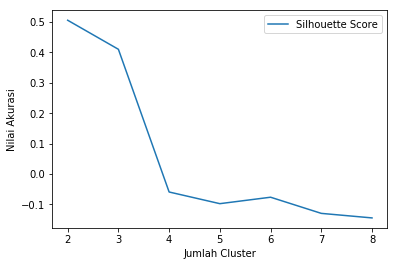

Nilai silhouette score dengan hasil the best generasi
[0.5058672768546286, 0.4223488140978904, -0.04573812063556541, -0.06770671479488445, -0.06763629596182037, -0.08791236826837662, -0.11504277411836233]


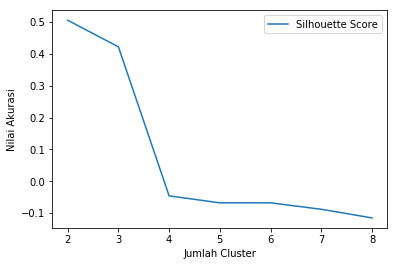

Nilai silhouette score dengan hasil KMEANS
[0.5014485204560788, 0.36029385561045935, 0.3536276966022036, 0.37646072095678224, 0.36163480499215733, 0.3573049500005526, 0.3624234255300563]


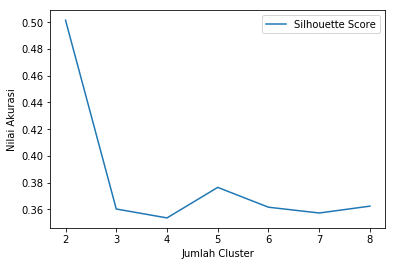

              method     Hasil
0  Generasi Terakhir  0.058177
1      Best Generasi  0.077740
2             KMEANS  0.381885


In [5]:
print("=======================================================")
print("Nilai silhouette score dengan hasil generasi terakhir")
print("=======================================================")
print(score1)
plt.plot([2,3,4,5,6,7,8], score1, label = 'Silhouette Score')

plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Akurasi')
plt.legend()
plt.show()


print("=======================================================")
print("Nilai silhouette score dengan hasil the best generasi")
print("=======================================================")
print(score2)
plt.plot([2,3,4,5,6,7,8], score2, label = 'Silhouette Score')

plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Akurasi')
plt.legend()
plt.show()

print("=======================================================")
print("Nilai silhouette score dengan hasil KMEANS")
print("=======================================================")
print(score3)
plt.plot([2,3,4,5,6,7,8], score3, label = 'Silhouette Score')

plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Akurasi')
plt.legend()
plt.show()

benchmark3 = {
    'method' : ['Generasi Terakhir', 'Best Generasi', 'KMEANS'],
    'Hasil' : [
        np.around(np.mean(score1), decimals=10),
        np.around(np.mean(score2), decimals=10),
        np.around(np.mean(score3), decimals=10),
    ],
}
benchmark_df = pd.DataFrame.from_dict(benchmark3)
print(benchmark_df)